In [38]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hcalcutt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hcalcutt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv("train_set.csv", engine ='python')

In [3]:
data.head()

,author,day,month,year,hour,minute,second,day_of_week,day_of_year,week_of_year,source,lang,is_retweet,has_hashtag,has_mentions,has_url,has_media,tweet
0,Neil deGrasse Tyson,3.0,2.0,2014.0,1.0,58.0,8.0,Mon,34.0,5.0,7.0,en,False,False,False,False,False,A 50-yard field goal in MetLife stadium will d...
1,Cristiano Ronaldo,22.0,12.0,2012.0,13.0,57.0,5.0,Sat,357.0,51.0,0.0,pt,False,True,True,False,False,RT @Thiaguinhooo14: Manda um abraço em portugu...
2,Ellen DeGeneres,22.0,3.0,2019.0,18.0,58.0,24.0,Fri,81.0,11.0,1.0,en,False,False,False,False,True,Today I’m talking about a topic that affects a...
3,Sebastian Ruder,13.0,6.0,2016.0,18.0,13.0,55.0,Mon,165.0,24.0,7.0,en,False,True,False,True,False,New blog post giving an overview of softmax ap...
4,KATY PERRY,18.0,4.0,2018.0,6.0,56.0,54.0,Wed,108.0,16.0,0.0,en,False,False,True,True,False,high of the day: 0 cavities 🙏🏻\nlow: @washingt...


In [6]:
data['author'].value_counts()

Barack Obama                                           2591
Kim Kardashian West                                    2588
KATY PERRY                                             2576
Neil deGrasse Tyson                                    2575
Snoop Dogg                                             2572
Cristiano Ronaldo                                      2559
Elon Musk                                              2556
Ellen DeGeneres                                        2549
Sebastian Ruder                                        2433
Donald J. Trump                                         165
See the full story June 9 in the @nikefootball App:       1
    https://t.co/R8bOUQ4SwF                               1
https://t.co/GzCcnRwwRp https://t.co/0Jgm7z9EaT           1
Name: author, dtype: int64

In [163]:
data['lang'].value_counts()

en     17934
und     1966
es       207
pt       153
tl        55
fr        55
it        36
in        27
et        26
nl        22
de        13
ht        12
ca        10
tr         8
no         8
ru         6
sv         6
pl         5
fi         5
ro         5
ja         4
cy         4
cs         4
da         4
lt         3
hi         3
is         3
eu         2
hu         2
sl         1
Name: lang, dtype: int64

In [15]:
data = data[data['author'].isin(['Barack Obama', 'Kim Kardashian West', 'KATY PERRY', 'Snoop Dogg', 'Cristiano Ronaldo', 'Elon Musk', 'Ellen DeGeneres', 'Sebastian Ruder', 'Donald J. Trump'])]

In [58]:
data[['day', 'month', 'year','hour', 'minute', 'second', 'day_of_year', 'week_of_year', 'source']] = data[['day', 'month', 'year','hour', 'minute', 'second', 'day_of_year', 'week_of_year', 'source']].astype(int)

In [47]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [147]:
date_group = data.groupby(['day','year', 'month','day_of_week','day_of_year','week_of_year'])['author'].value_counts().rename("Number of tweets").reset_index()
date_group['date'] = pd.to_datetime(date_group[['year', 'month', 'day']])


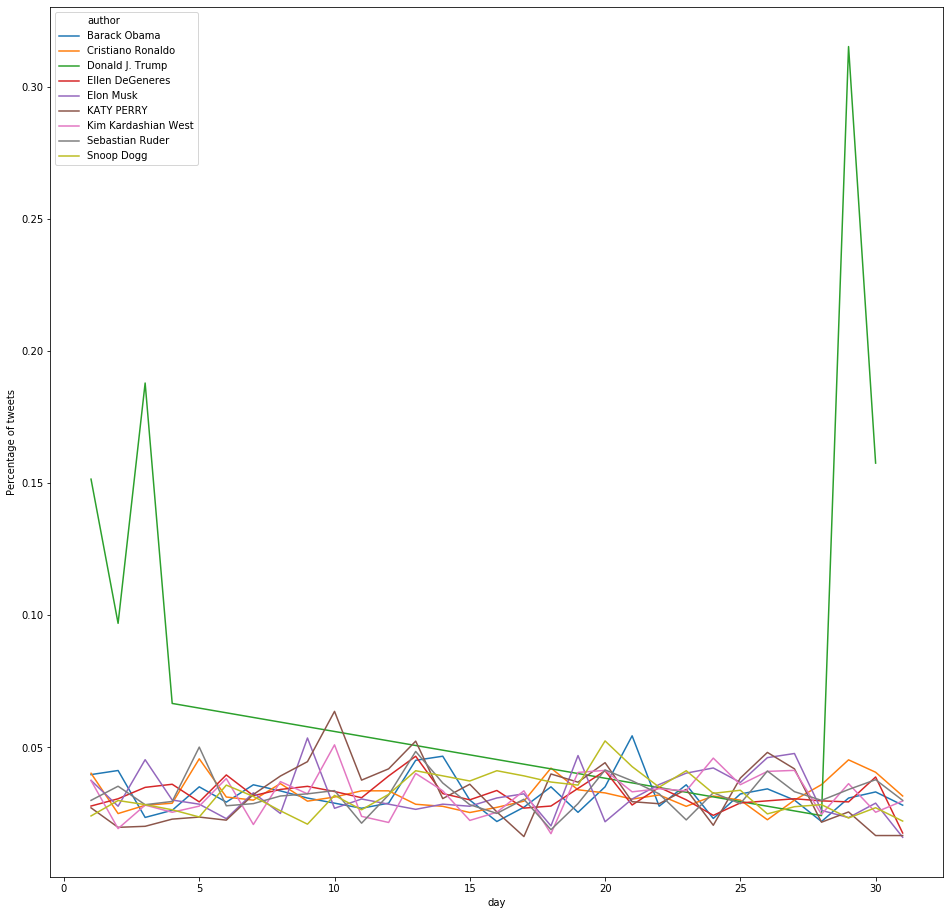

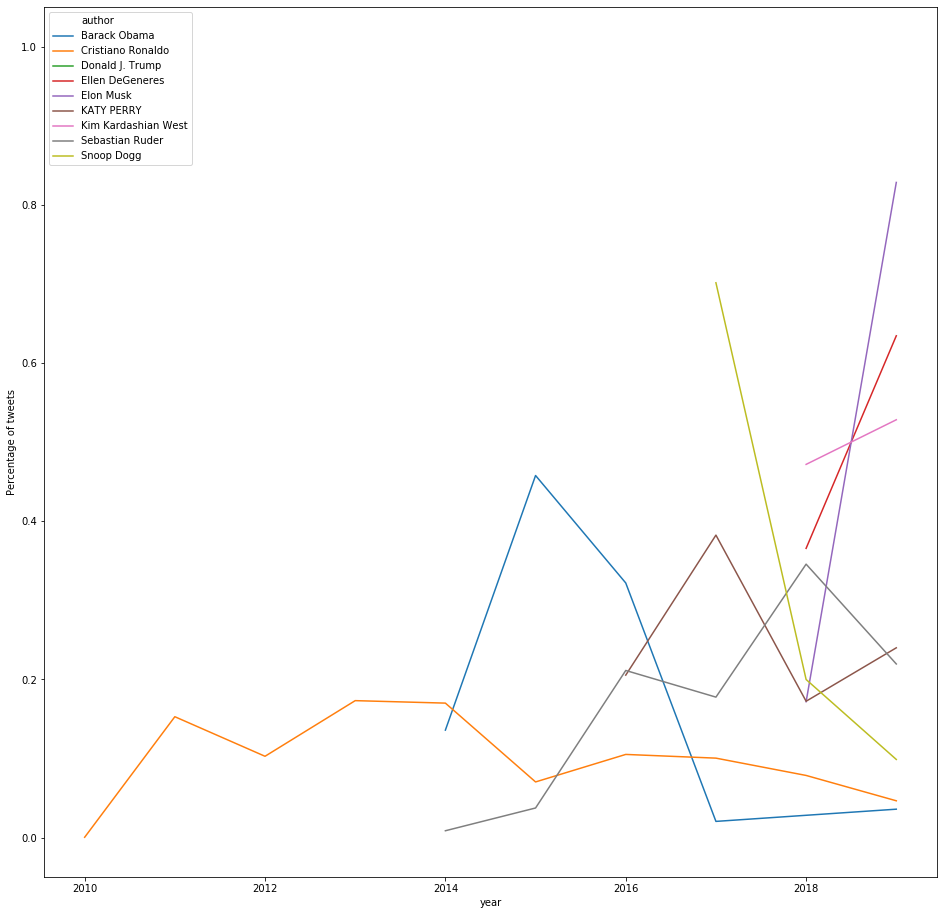

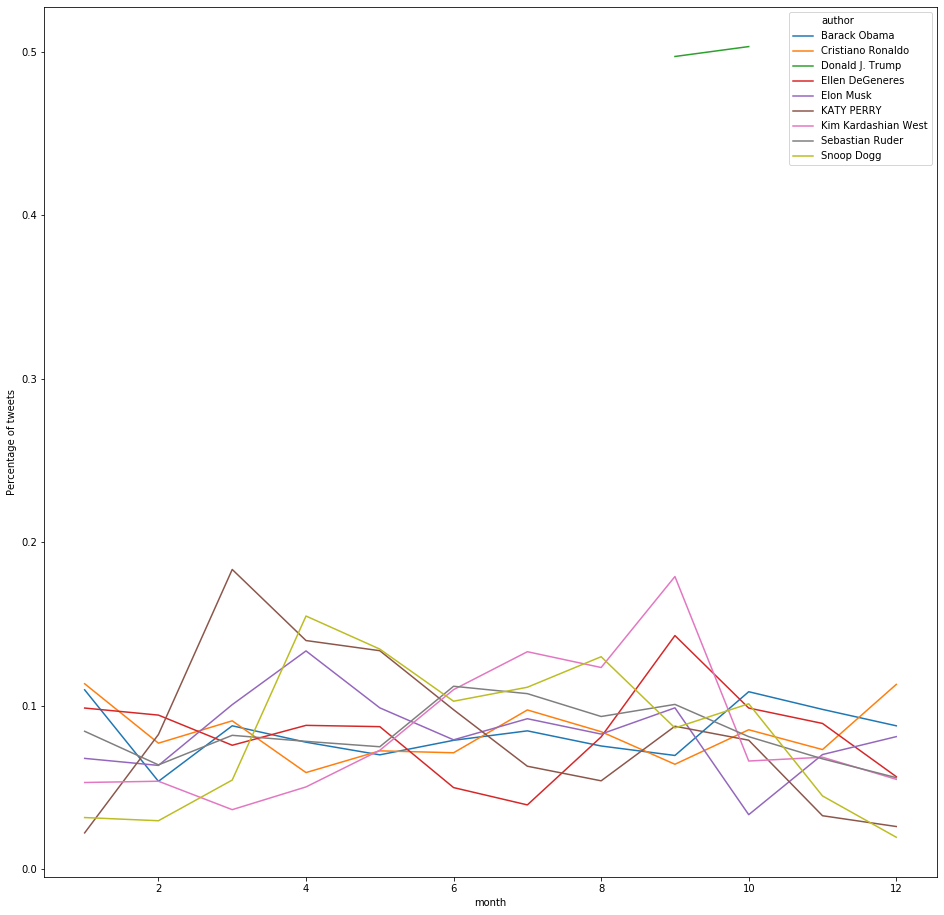

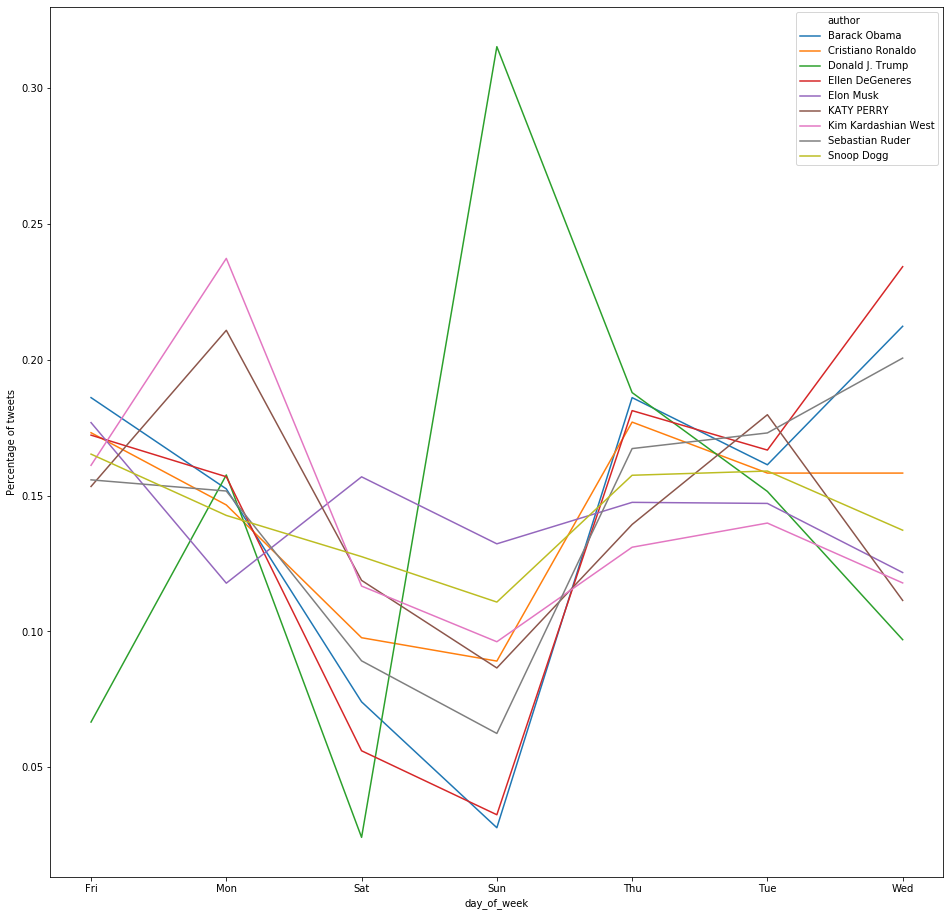

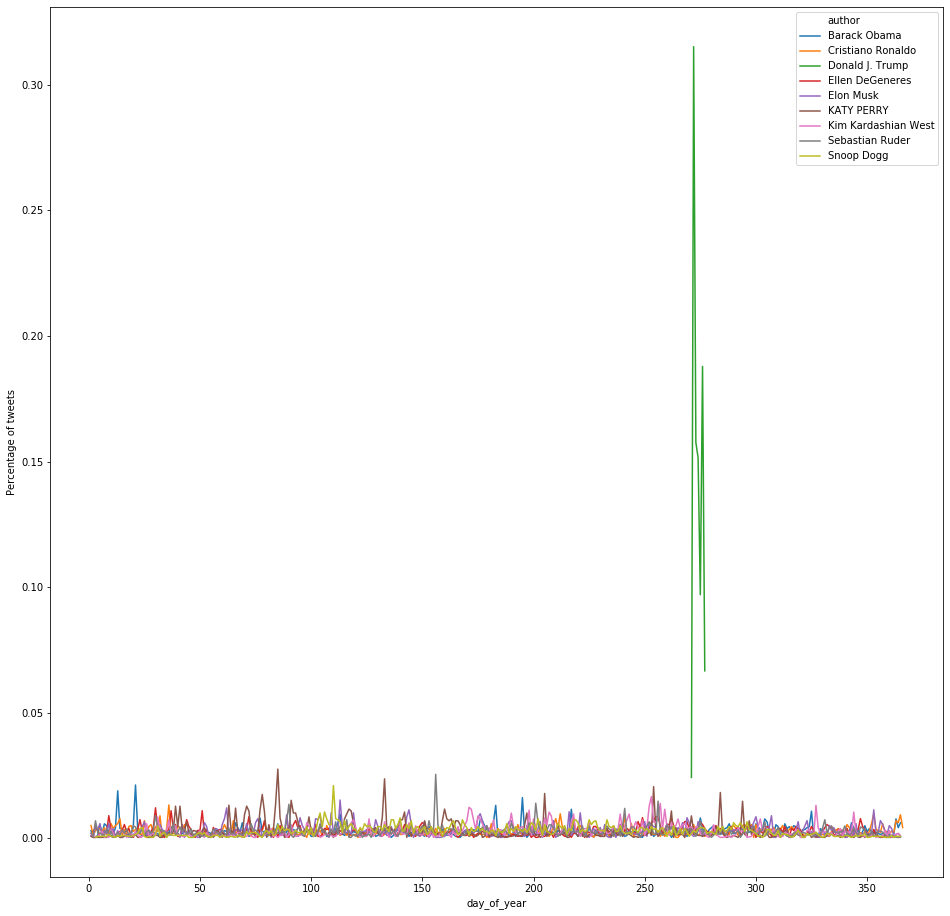

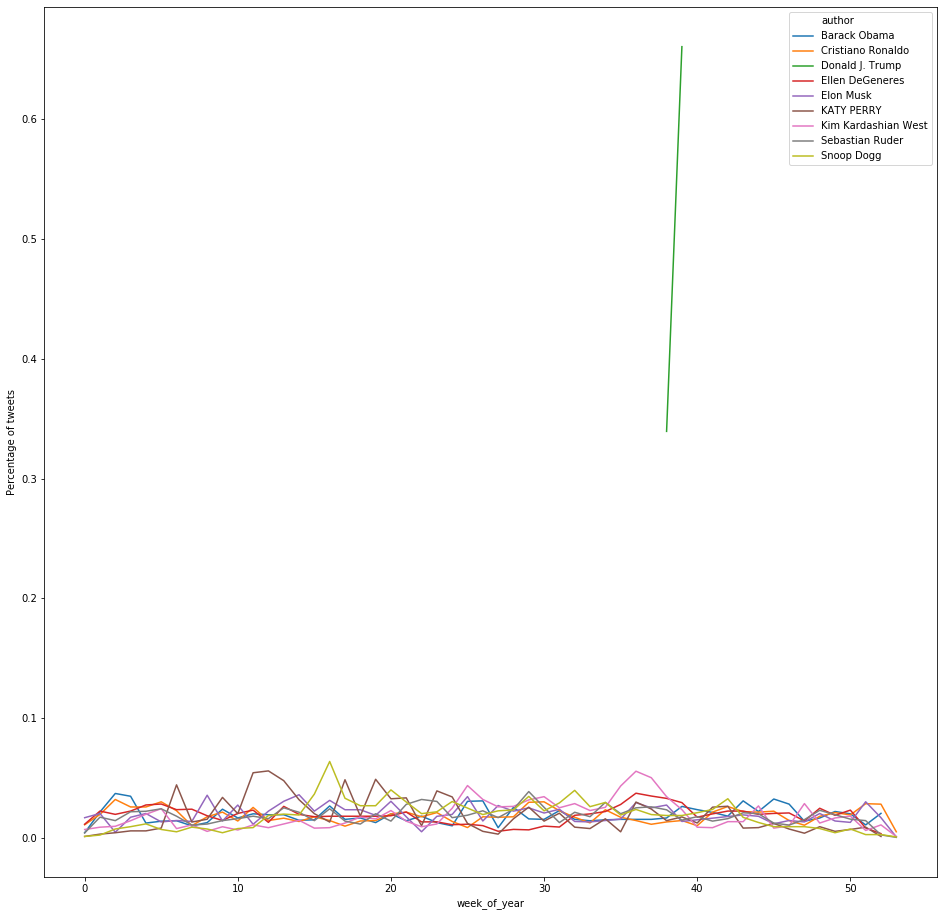

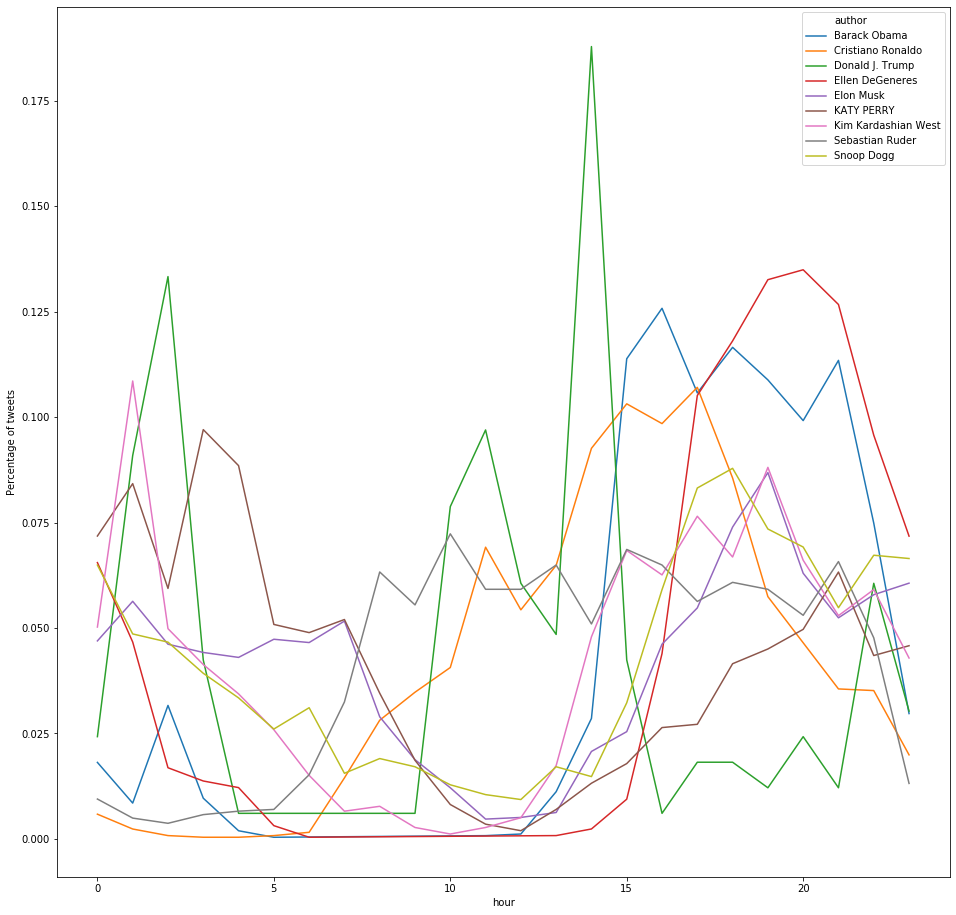

In [215]:
for var in ['day','year', 'month','day_of_week','day_of_year','week_of_year', 'hour']:
    fig = plt.figure(figsize = (16,16))
    sns.lineplot(x = var, y = 'Percentage of tweets', hue = 'author', data = data[var].groupby(data['author']).value_counts(normalize=True).rename("Percentage of tweets").reset_index(),estimator=sum )
    #if var == 'day_of_week':
        #sns.lineplot(x = var, y = 'Percentage of tweets', hue = 'author', data = data[var].groupby(data['author']).value_counts(normalize=True).rename("Percentage of tweets").reset_index(),h,estimator=sum)


We see that we don't have tweets for all the days for every author. Infact, we have sampled tweets from every author from a specific time window. As such, only seasonality which we can tell from this data if the authors' tweet pattern follow weekly or hourly trend. Apart from this, other time variables will not tell the actual tweeting pattern of the author.
We could see definitely that each author has different twitter activity on different days of week. Donald Trump has maximum tweets on Sunday whereas Obama tweets mostly on week days (Thursdays and Tuesdays). Similarly some authors tweet during morning hours whereas some have more twitter activity at night.

Though, this tells us about the twitter activity of the author, using information about the day and time of tweet we can tell if an author tweets during a particular time in a particular day of the week. However, it does not makes sense to attribute tweet to an author because the tweet appears during a certain period of time in day or paarticular day of week. Hence, we will not include these variables in building the model.  

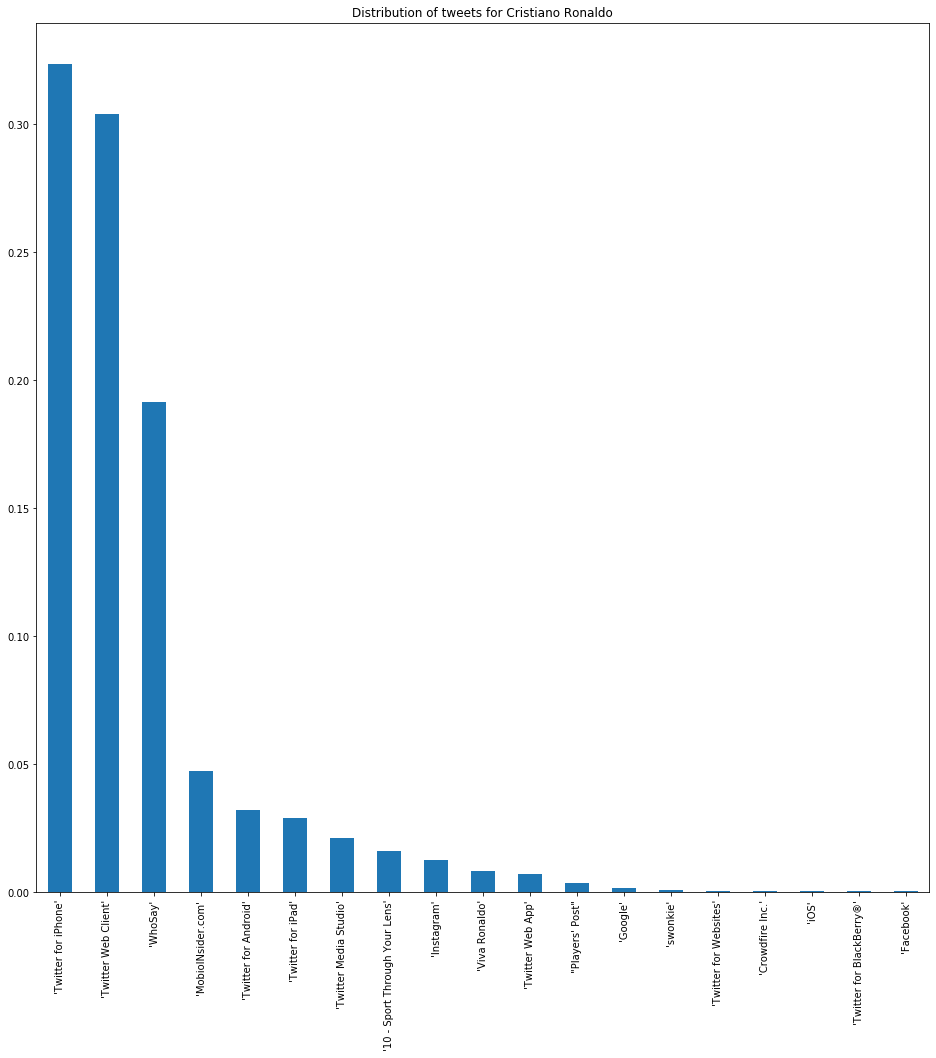

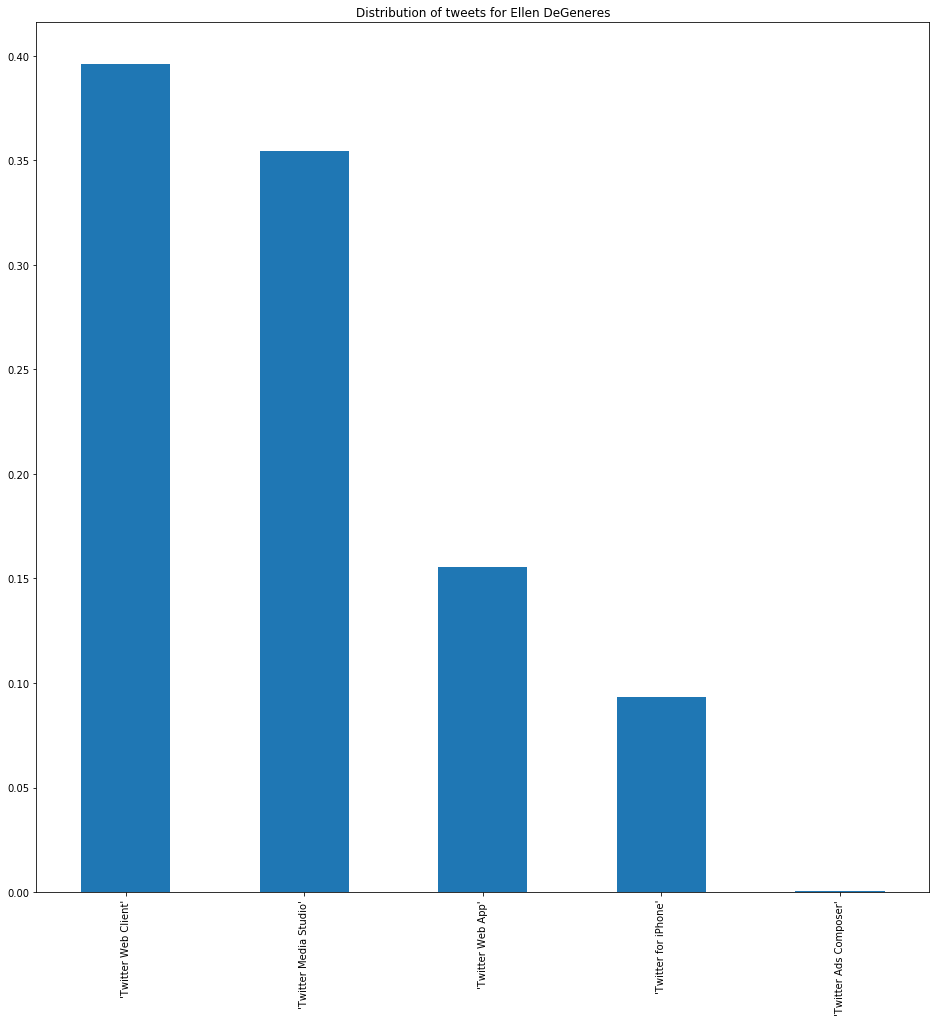

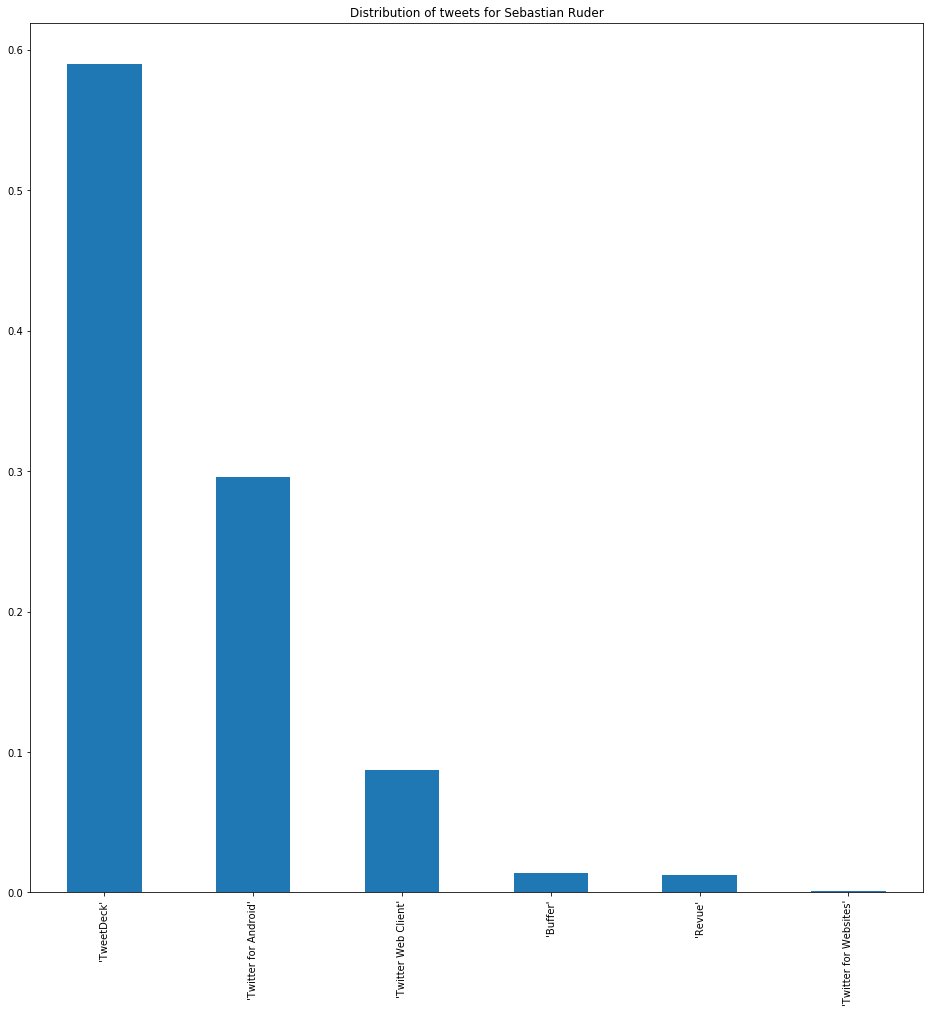

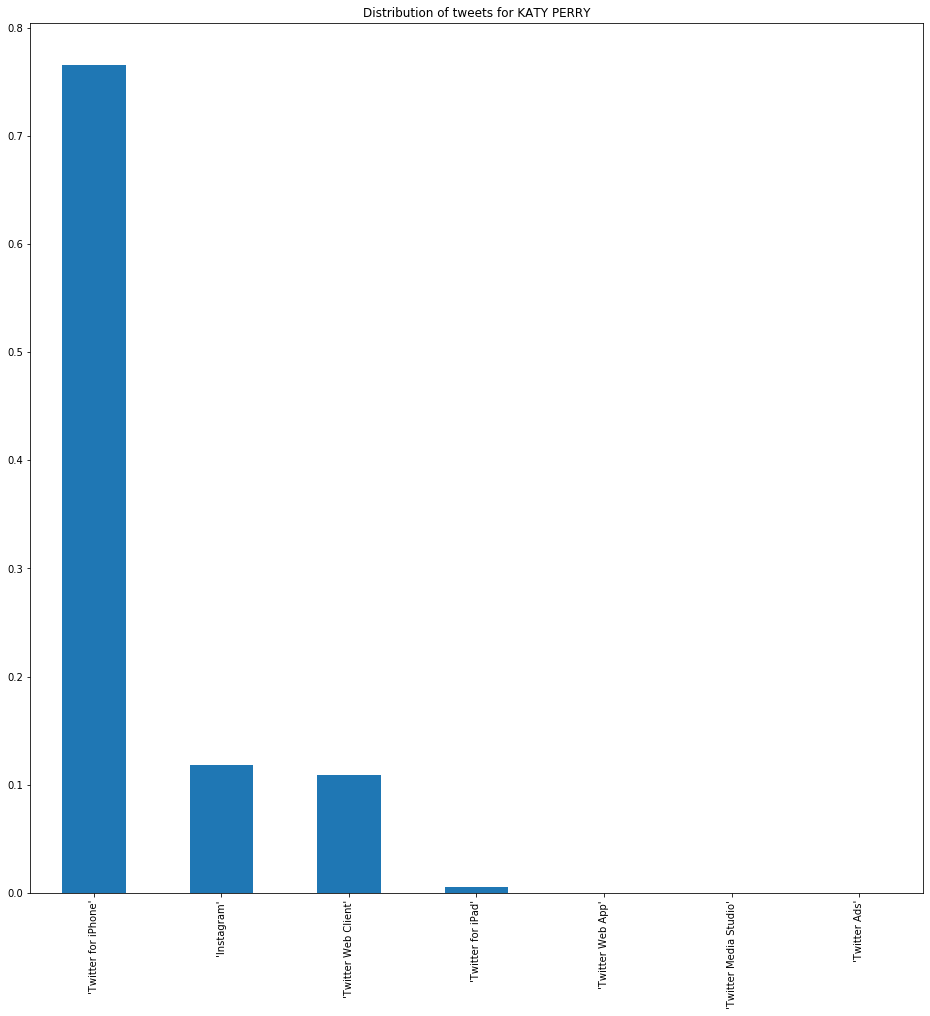

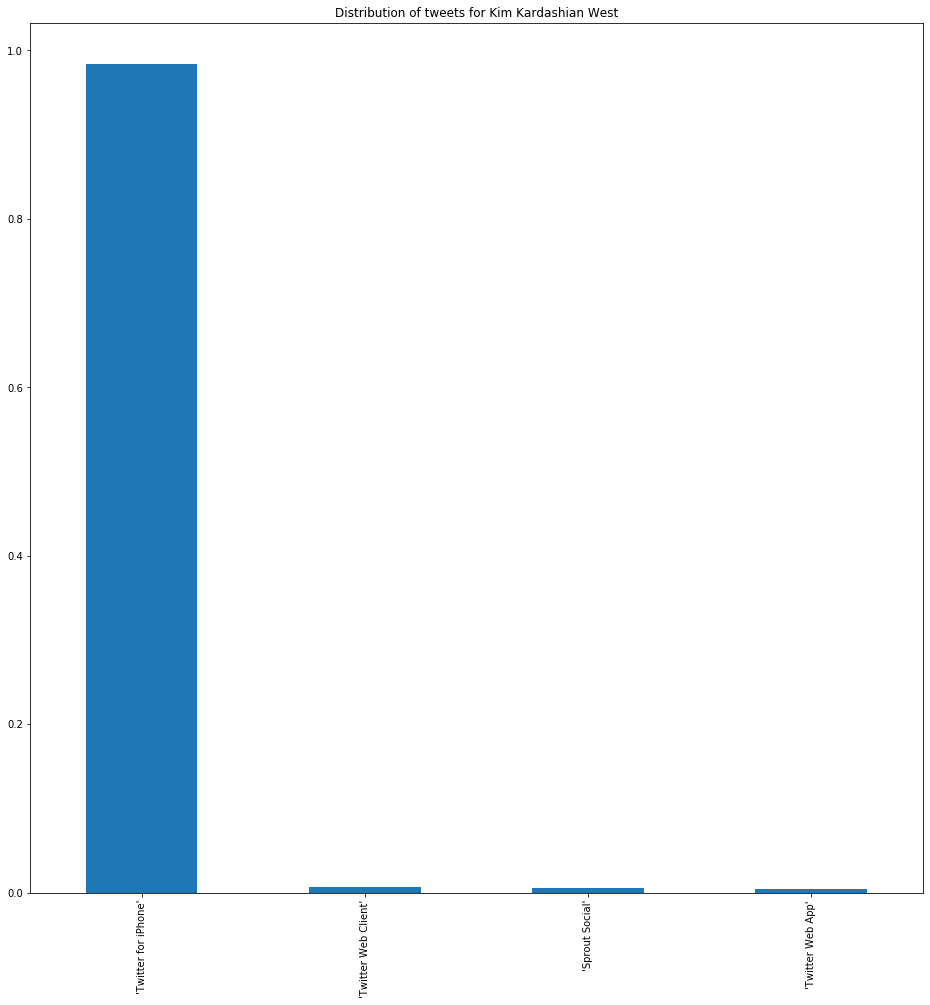

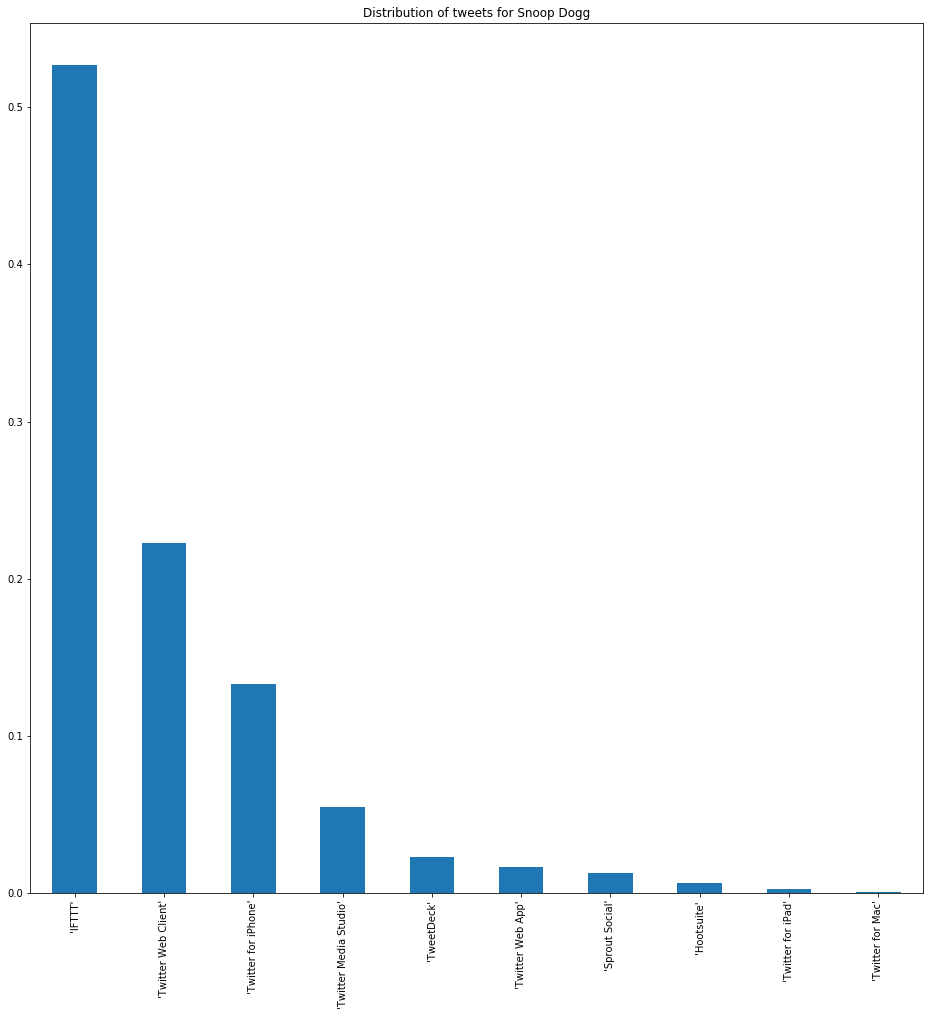

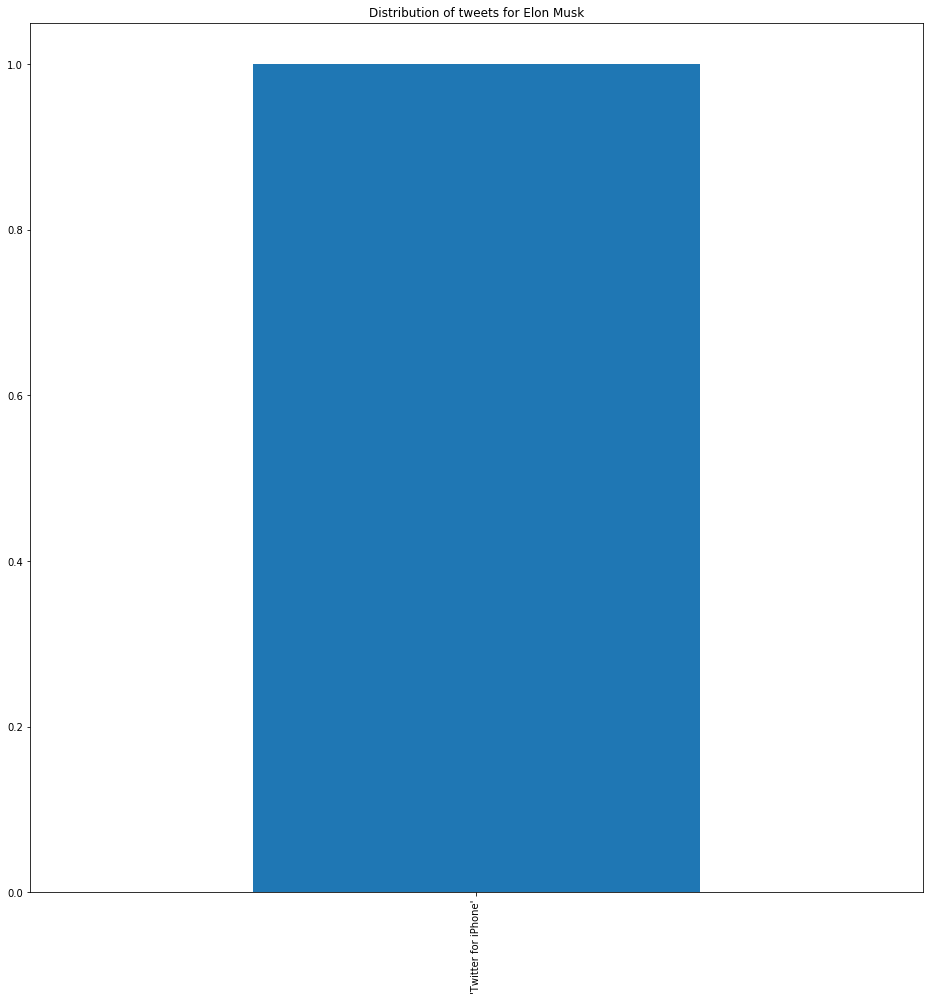

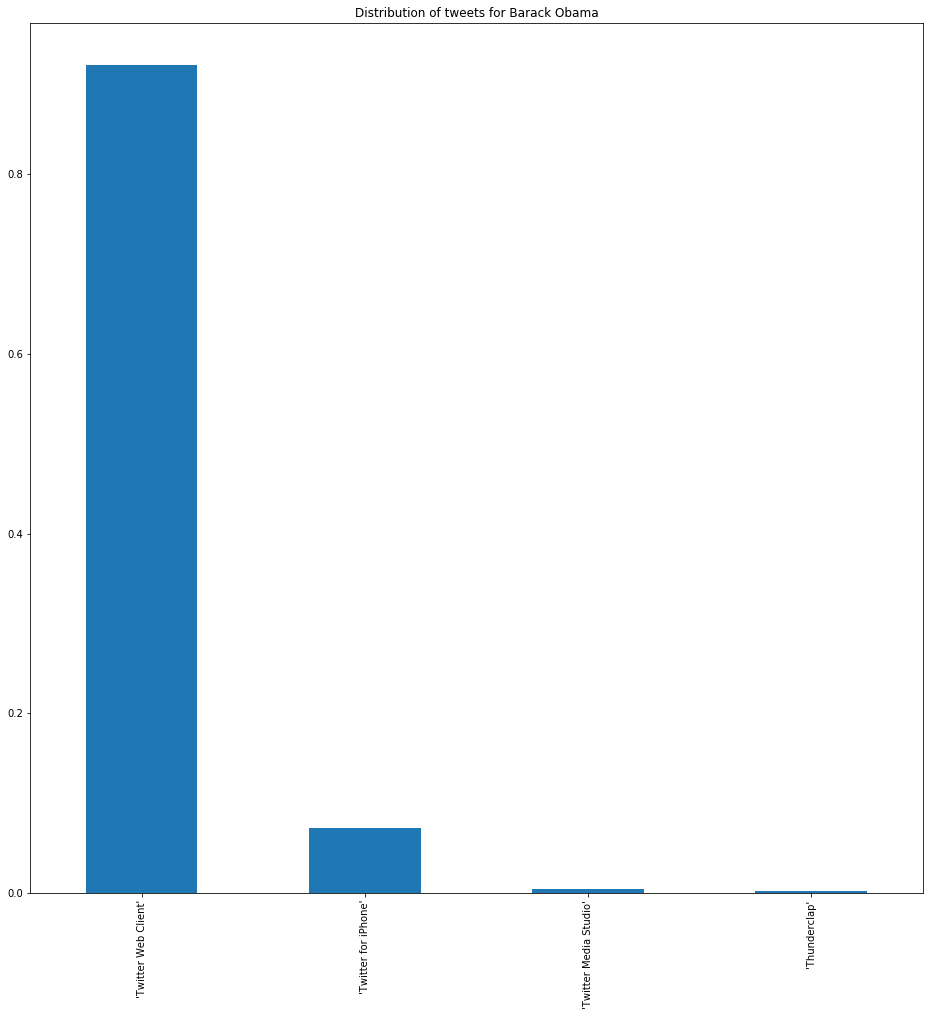

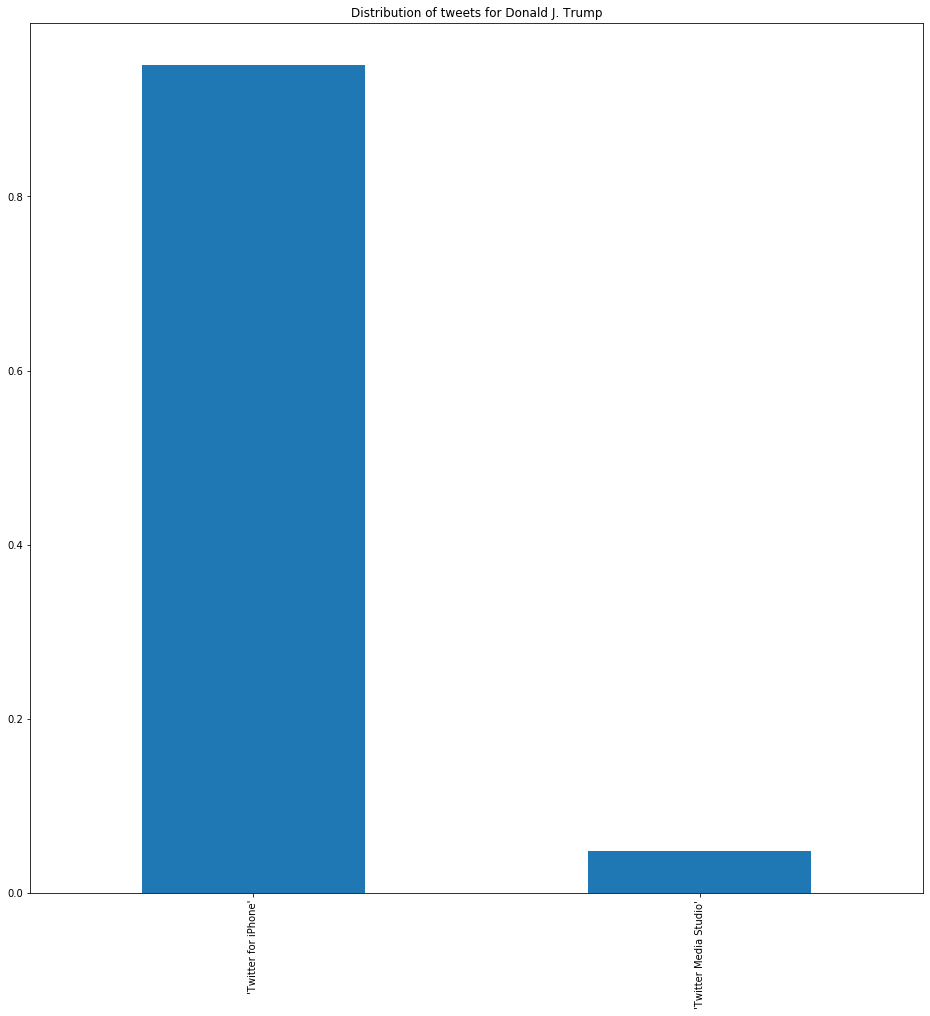

In [234]:
source_map = {}
with open("source_mapping.txt" ,'r') as inp:
    for line in inp:
        source_map[int(line.strip().split(":")[1].strip())] = line.strip().split(":")[0]
data['source_info'] = data['source'].apply(lambda x:source_map[x])

for author in pd.unique(data['author']):
    fig = plt.figure(figsize = (16,16))
    data[data['author']==author]['source_info'].value_counts(normalize=True).plot.bar()
    plt.title("Distribution of tweets for %s" % author)
    

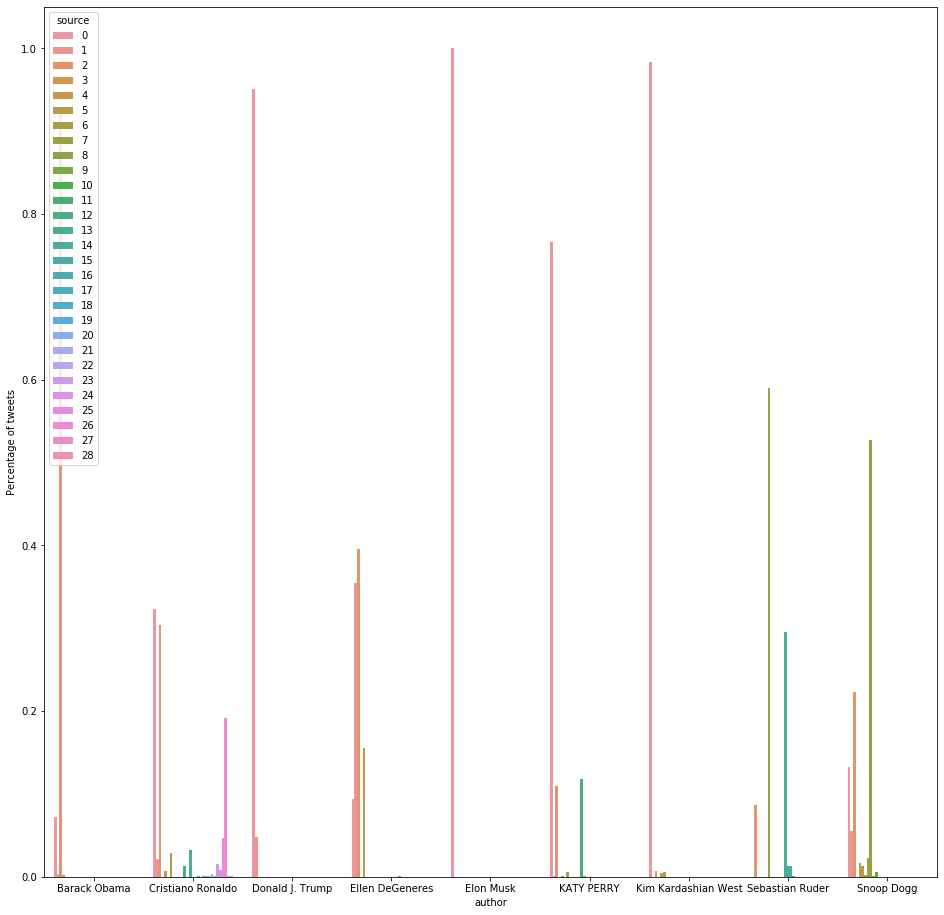

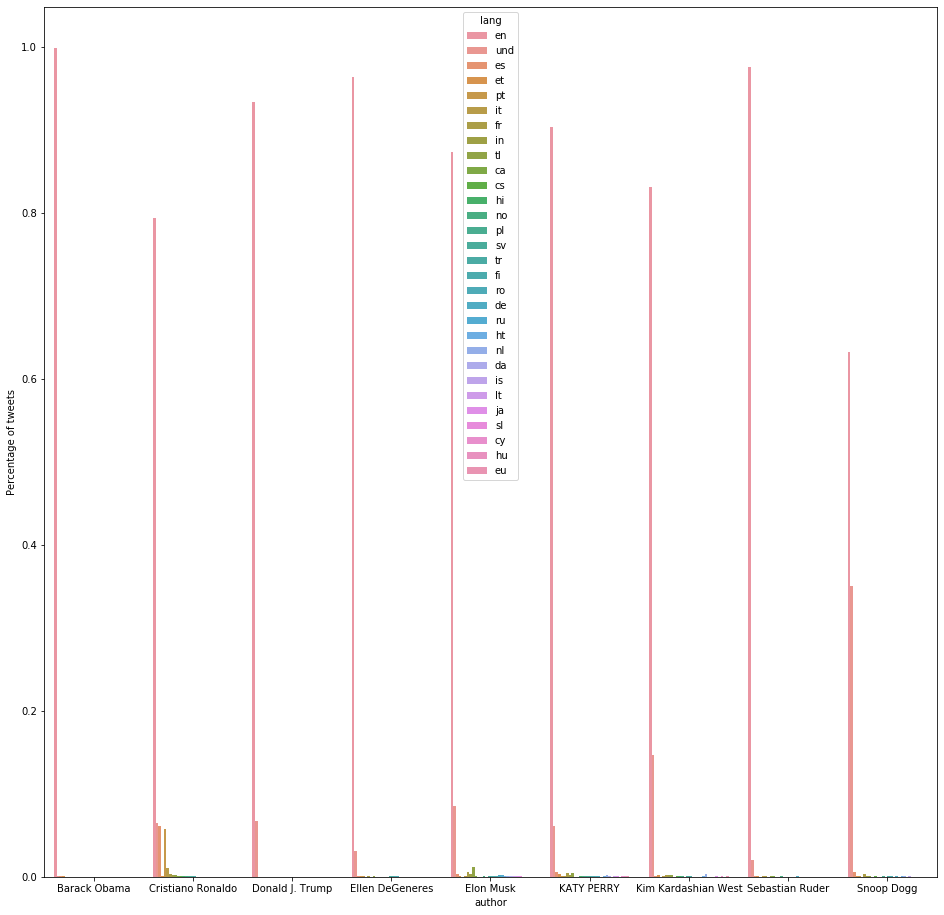

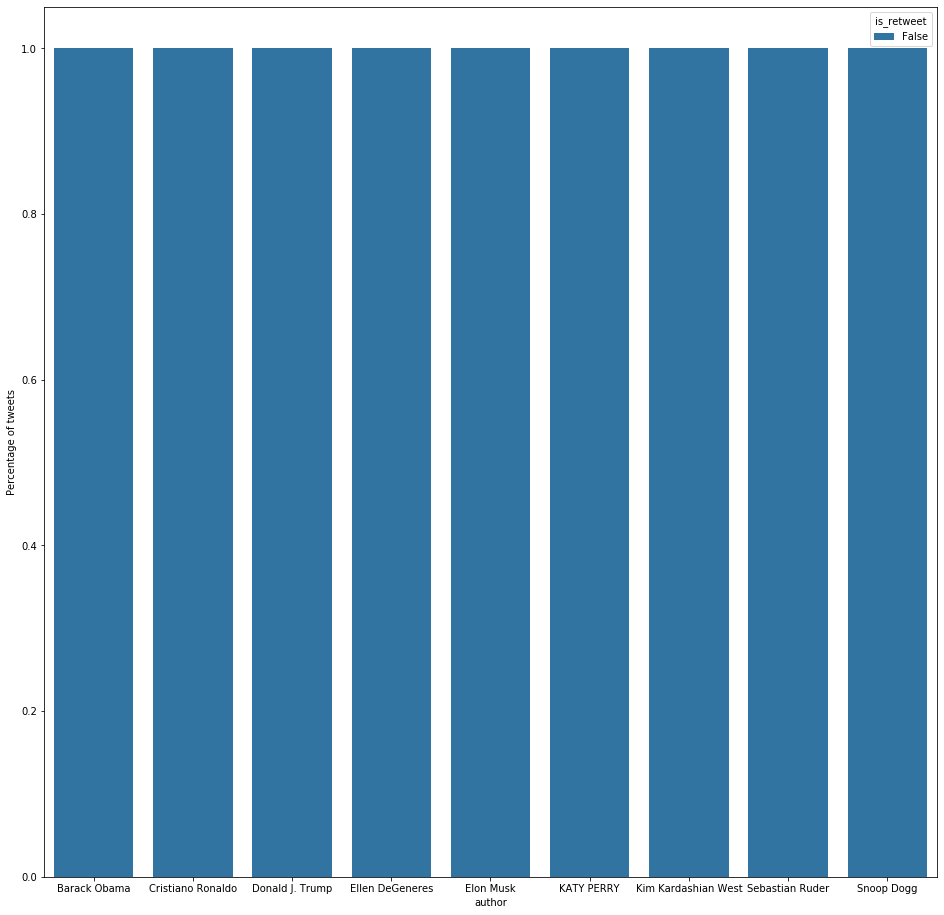

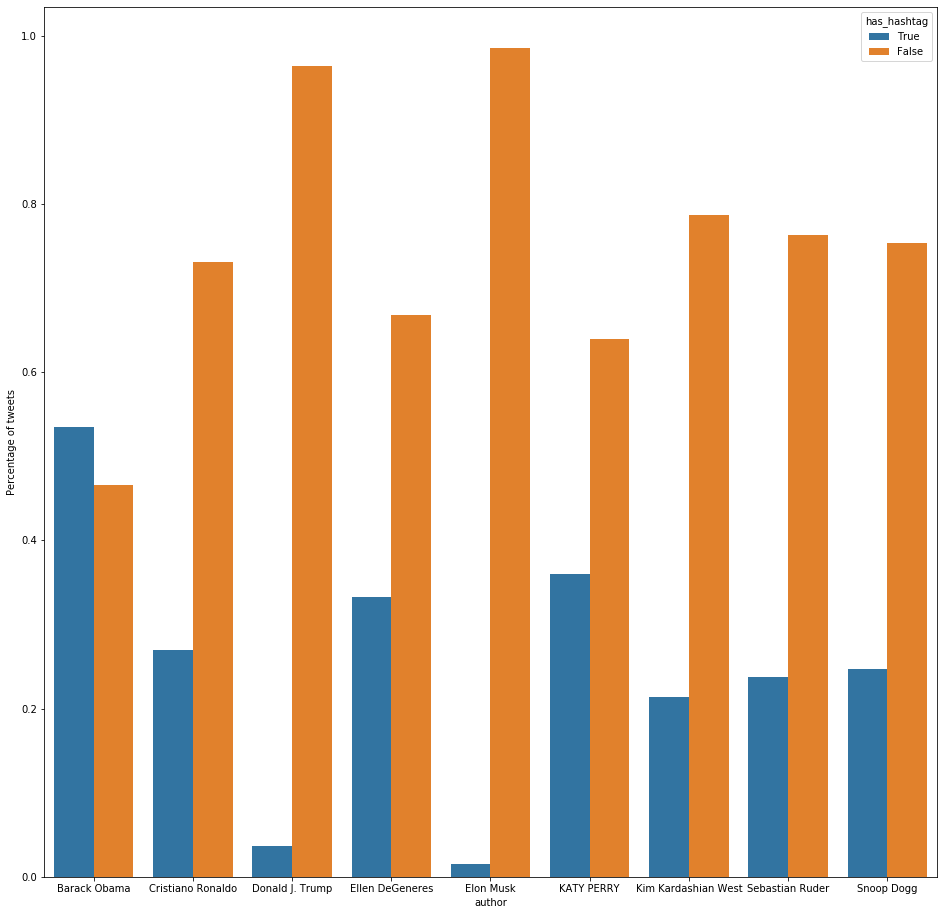

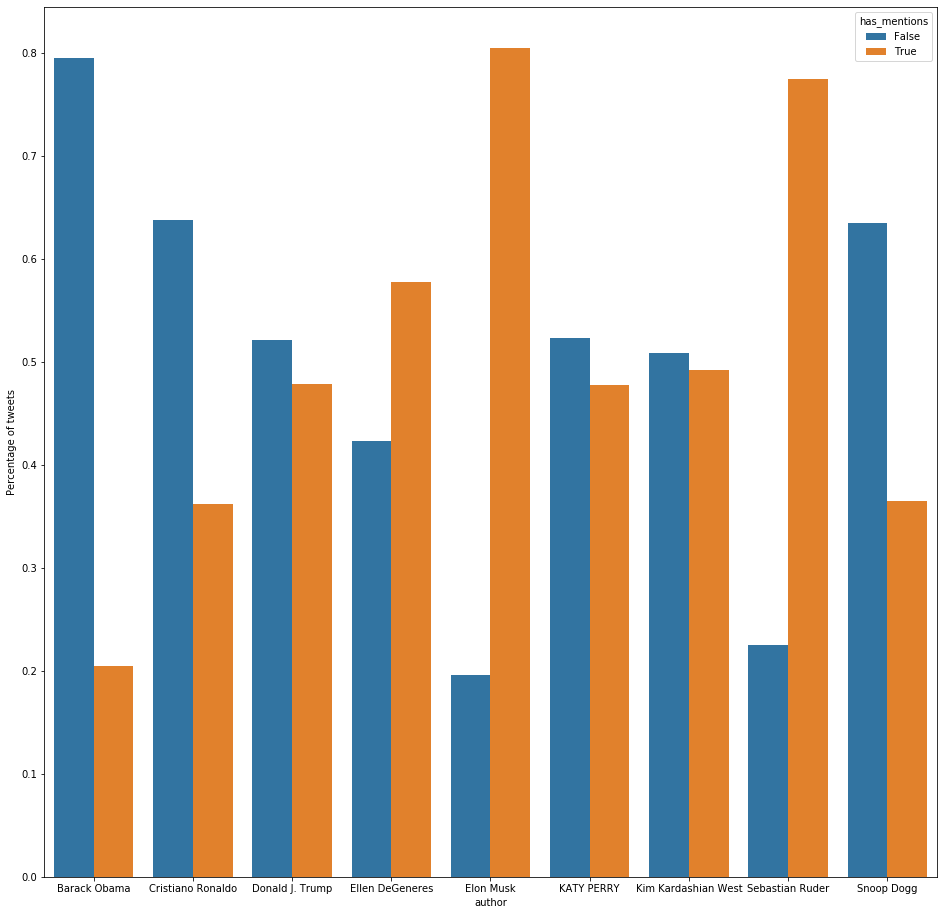

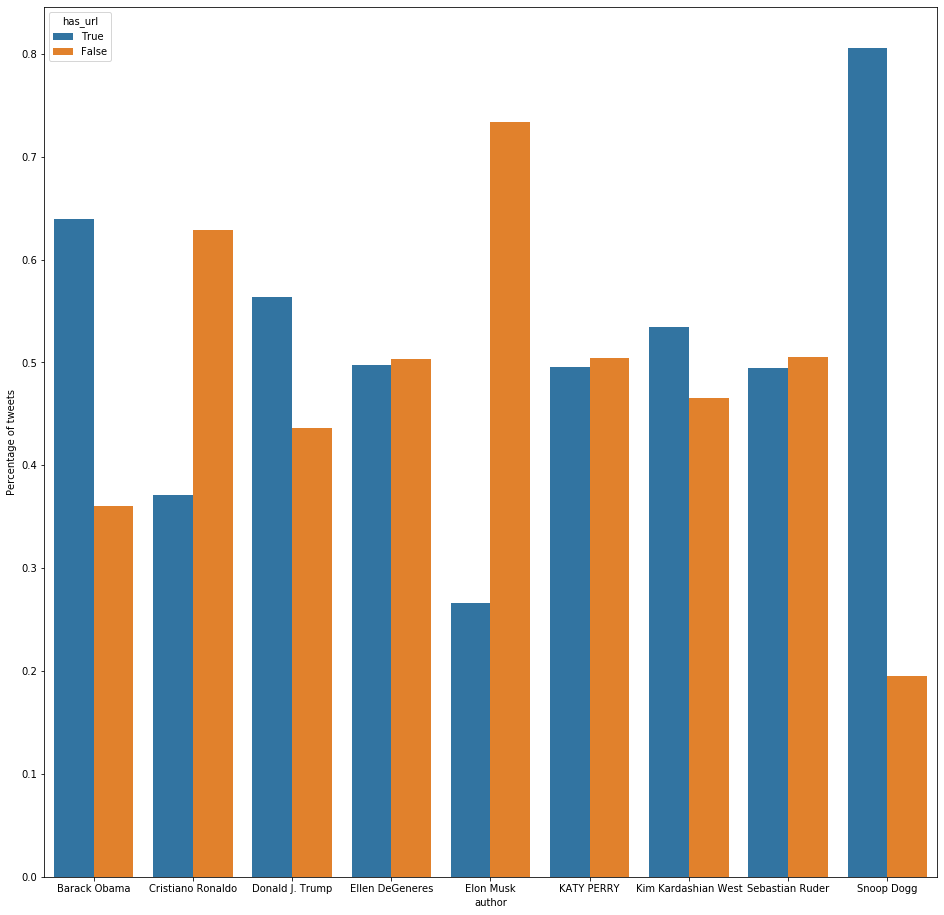

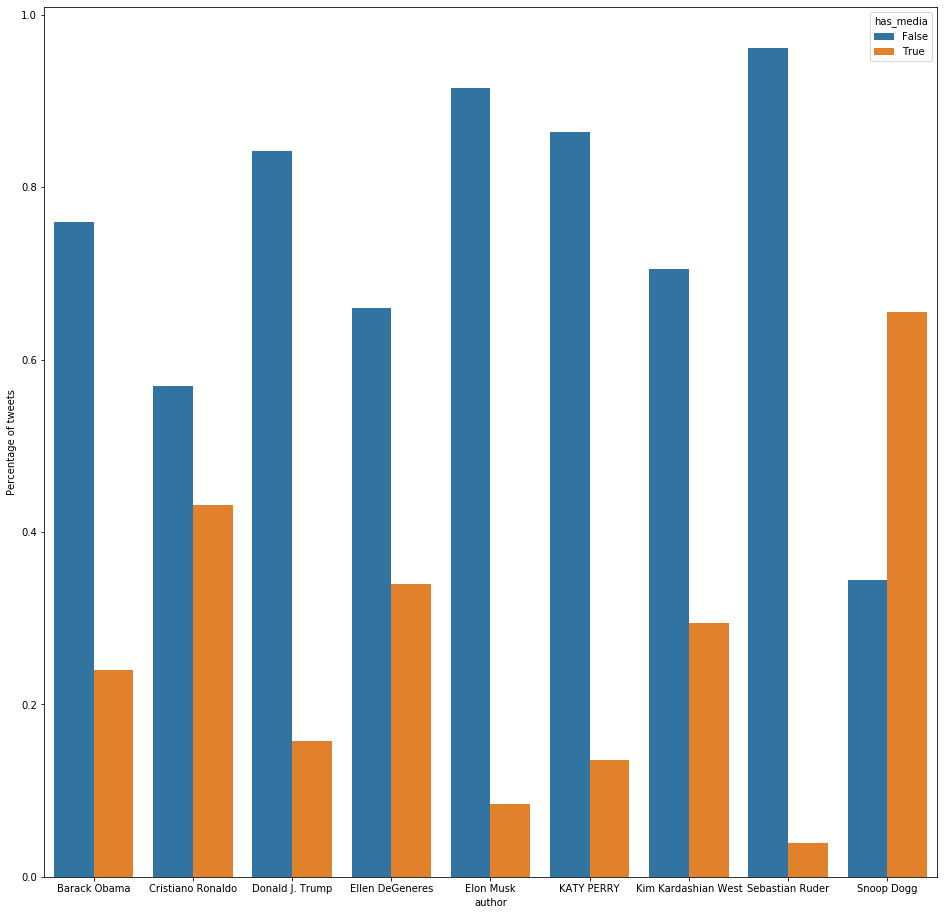

In [162]:
for var in ['lang', 'is_retweet','has_hashtag','has_mentions','has_url','has_media']:
    fig = plt.figure(figsize = (16,16))
    sns.barplot(x = 'author', y = 'Percentage of tweets', hue = var, data = data[var].groupby(data['author']).value_counts(normalize=True).rename("Percentage of tweets").reset_index(),estimator=sum )

In [194]:
data['tweet'] = data['tweet'].str.lower().str.replace('[^\w\s]', ' ')

In [195]:
data['lexical_diversity'] = data['tweet'].str.split(" ").apply(lambda x: len(set(x))/len(x))

In [196]:
data['no_of_chars_tweet'] = data['tweet'].str.split(" ").apply(lambda x:sum([len(word) for word in x]))

In [197]:
data['no_of_words'] = data['tweet'].str.split(" ").apply(lambda x:len(x))

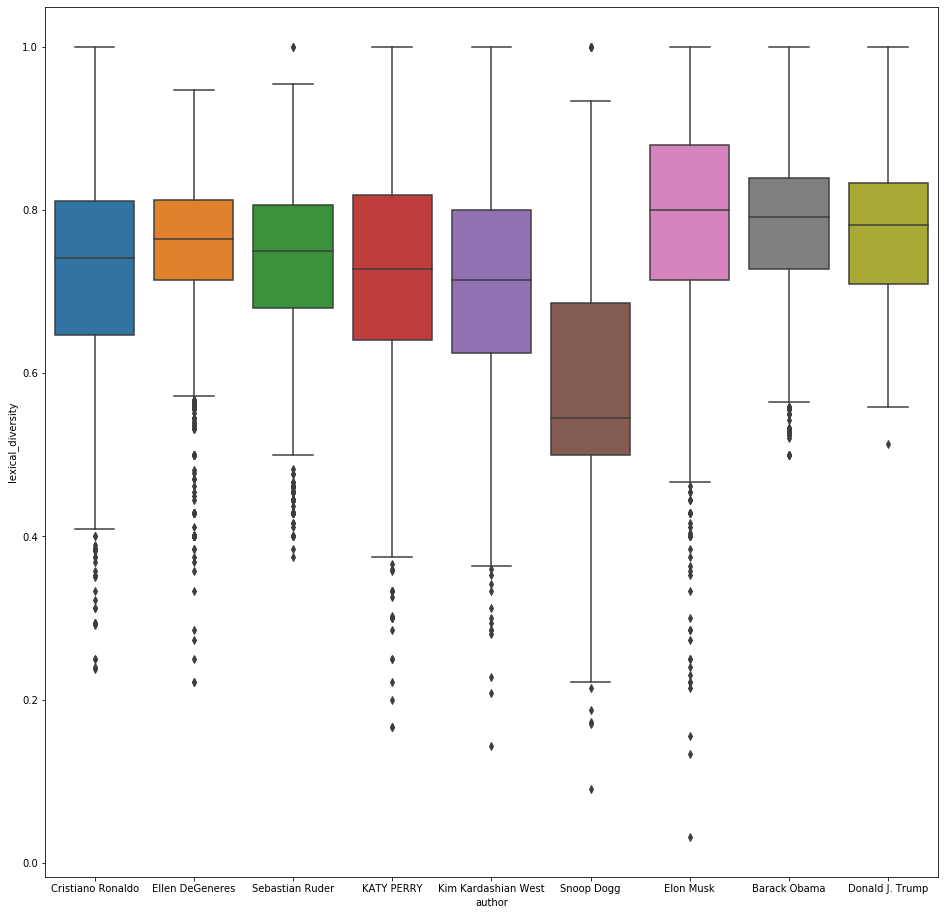

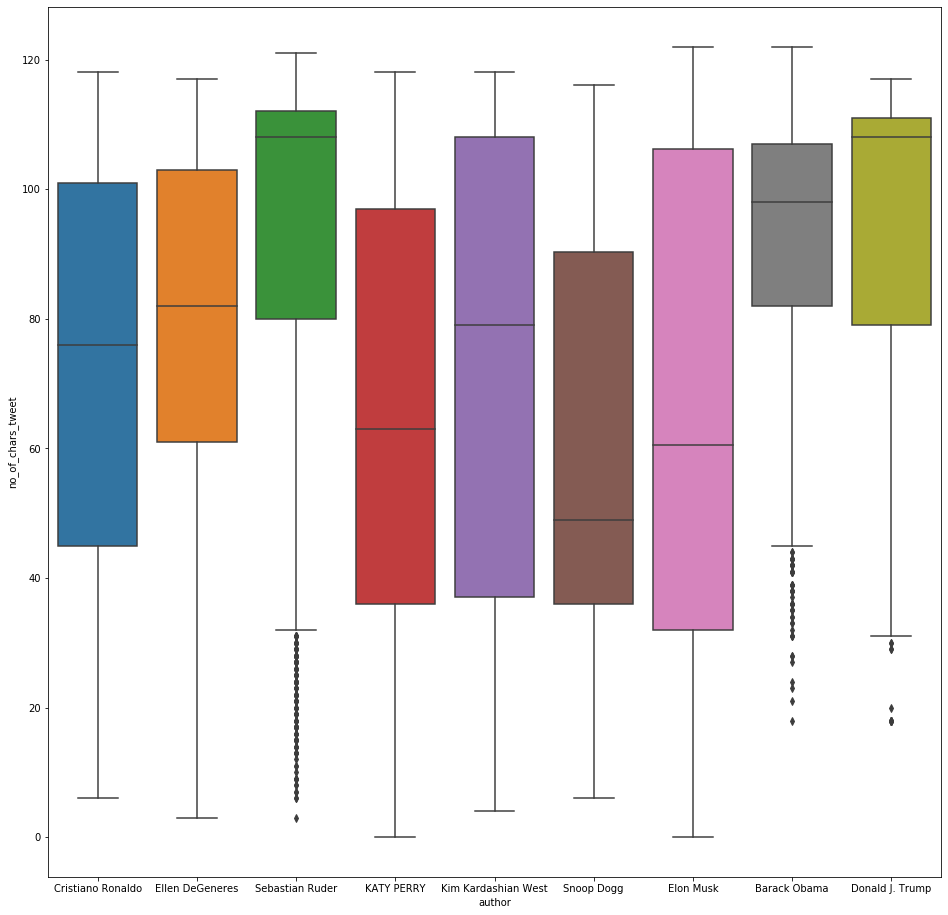

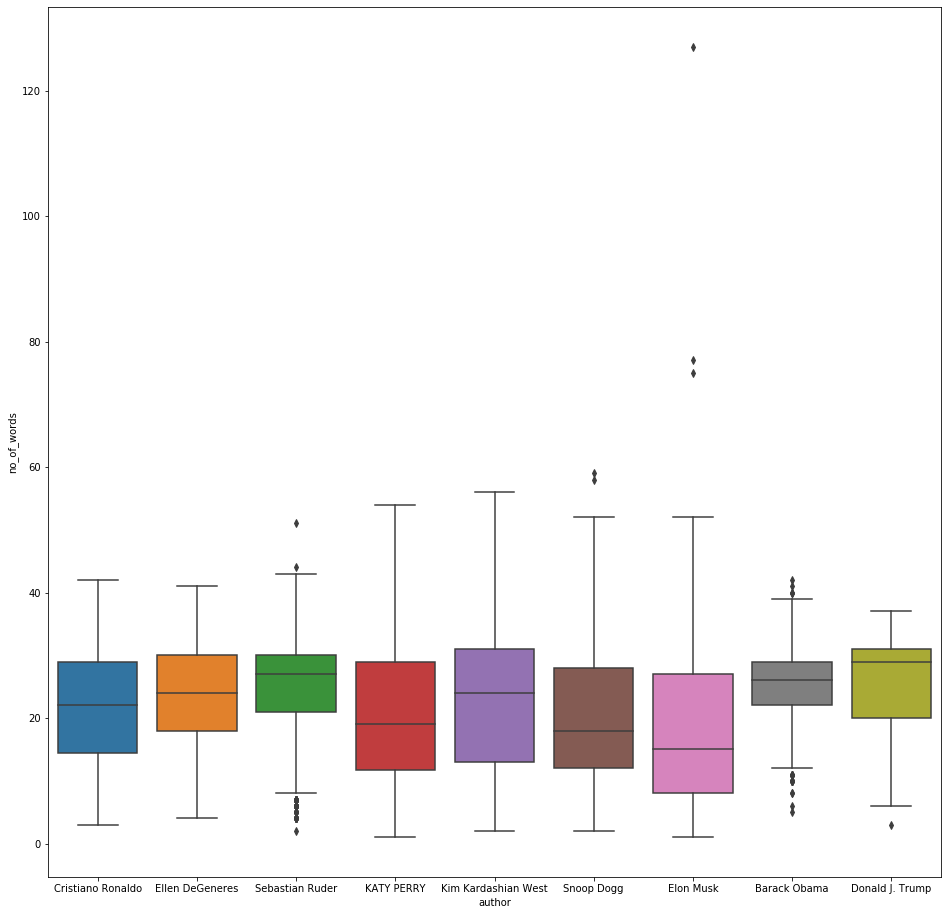

In [198]:
for var in ['lexical_diversity','no_of_chars_tweet', 'no_of_words']:
    fig = plt.figure(figsize = (16,16))
    sns.boxplot(x = 'author', y = var, data = data)

In [199]:
all_stopwords = stopwords.words('english') + stopwords.words('german') + stopwords.words('italian') + stopwords.words('french') + stopwords.words('portuguese') + stopwords.words('spanish')
all_stopwords.extend(['http', 'https'])
pat = r'\b(?:{})\b'.format('|'.join(all_stopwords))
data['tweet_no_stop'] = data['tweet'].str.replace(pat, '').apply(lambda x: " ".join(x.split()))

In [200]:
data['lexical_diversity_no_stop'] = data['tweet_no_stop'].str.split(" ").apply(lambda x: len(set(x))/len(x))
data['no_of_chars_tweet_no_stop'] = data['tweet_no_stop'].str.split(" ").apply(lambda x:sum([len(word) for word in x]))
data['no_of_words_no_stop'] = data['tweet_no_stop'].str.split(" ").apply(lambda x:len(x))

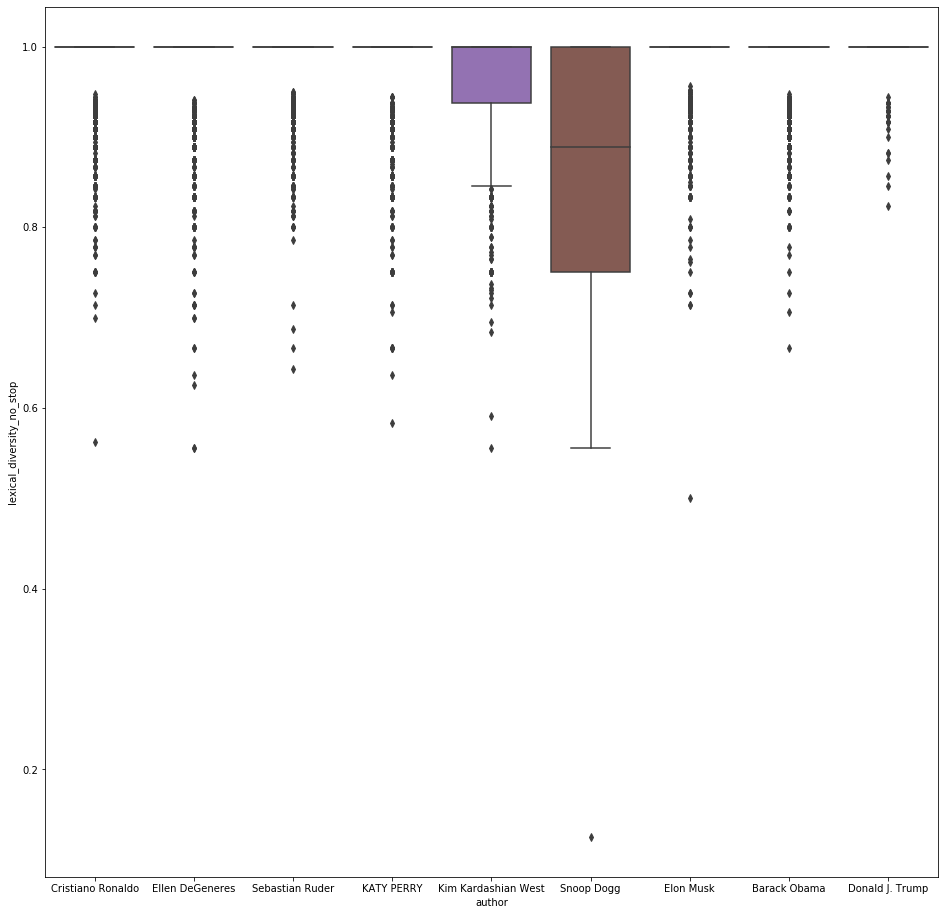

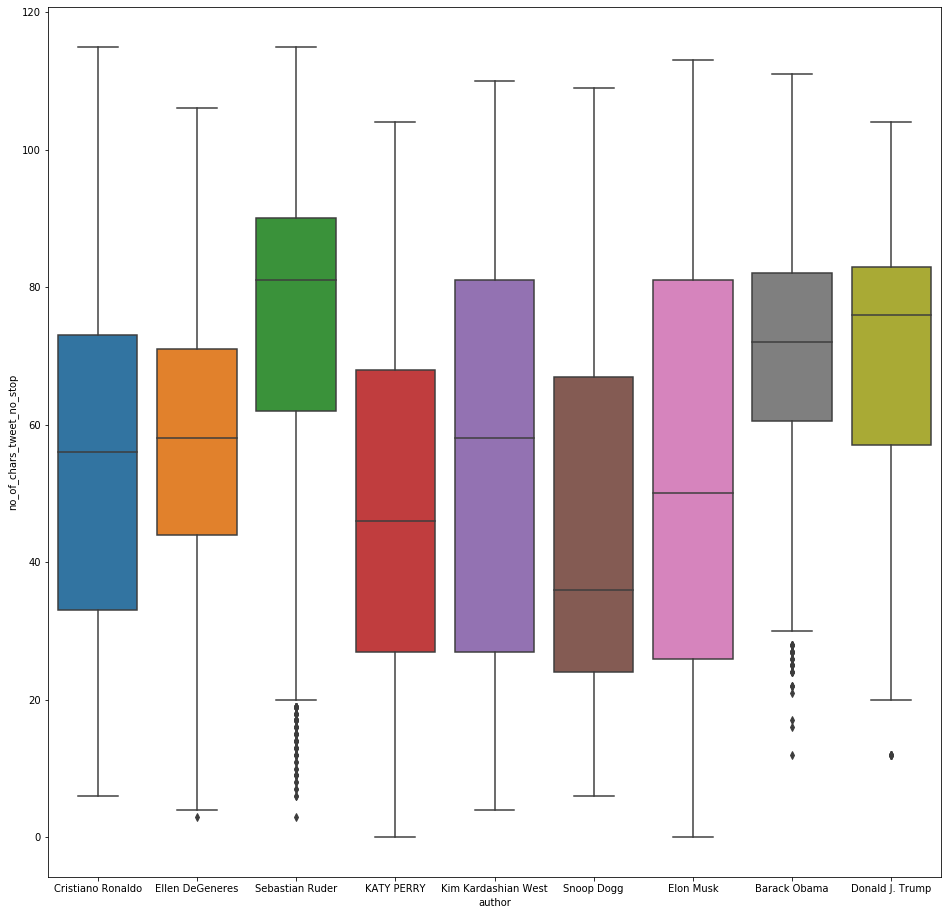

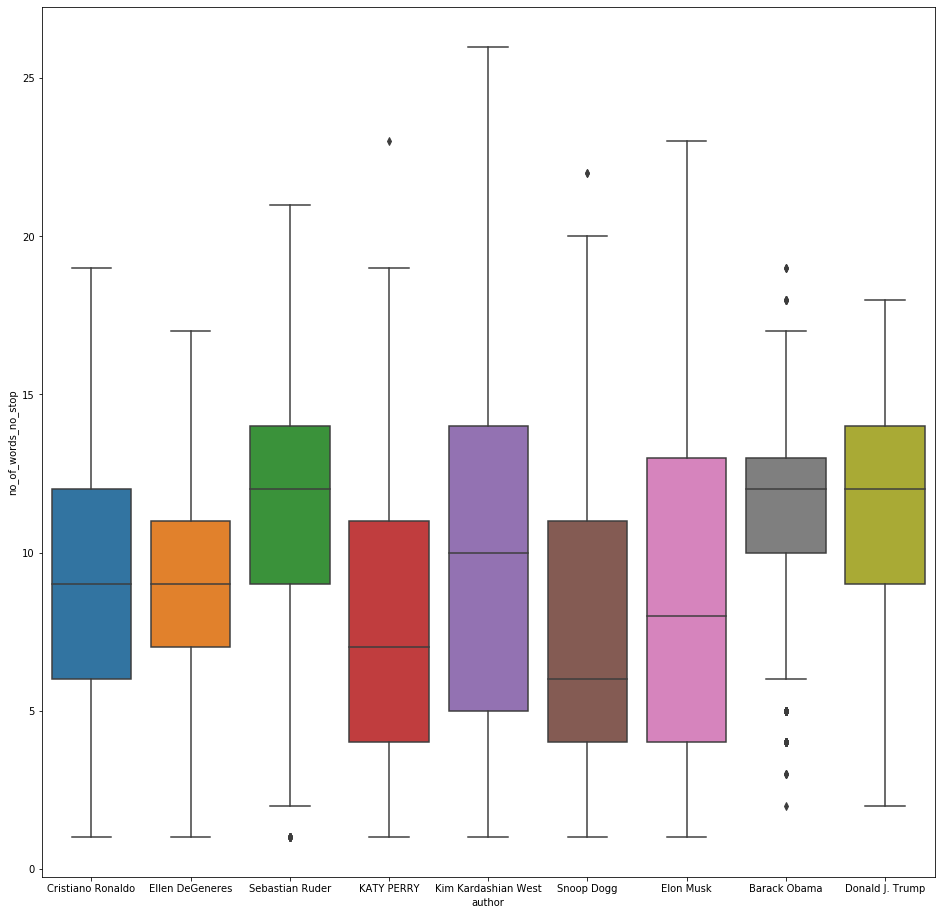

In [201]:
for var in ['lexical_diversity_no_stop','no_of_chars_tweet_no_stop', 'no_of_words_no_stop']:
    fig = plt.figure(figsize = (16,16))
    sns.boxplot(x = 'author', y = var, data = data)

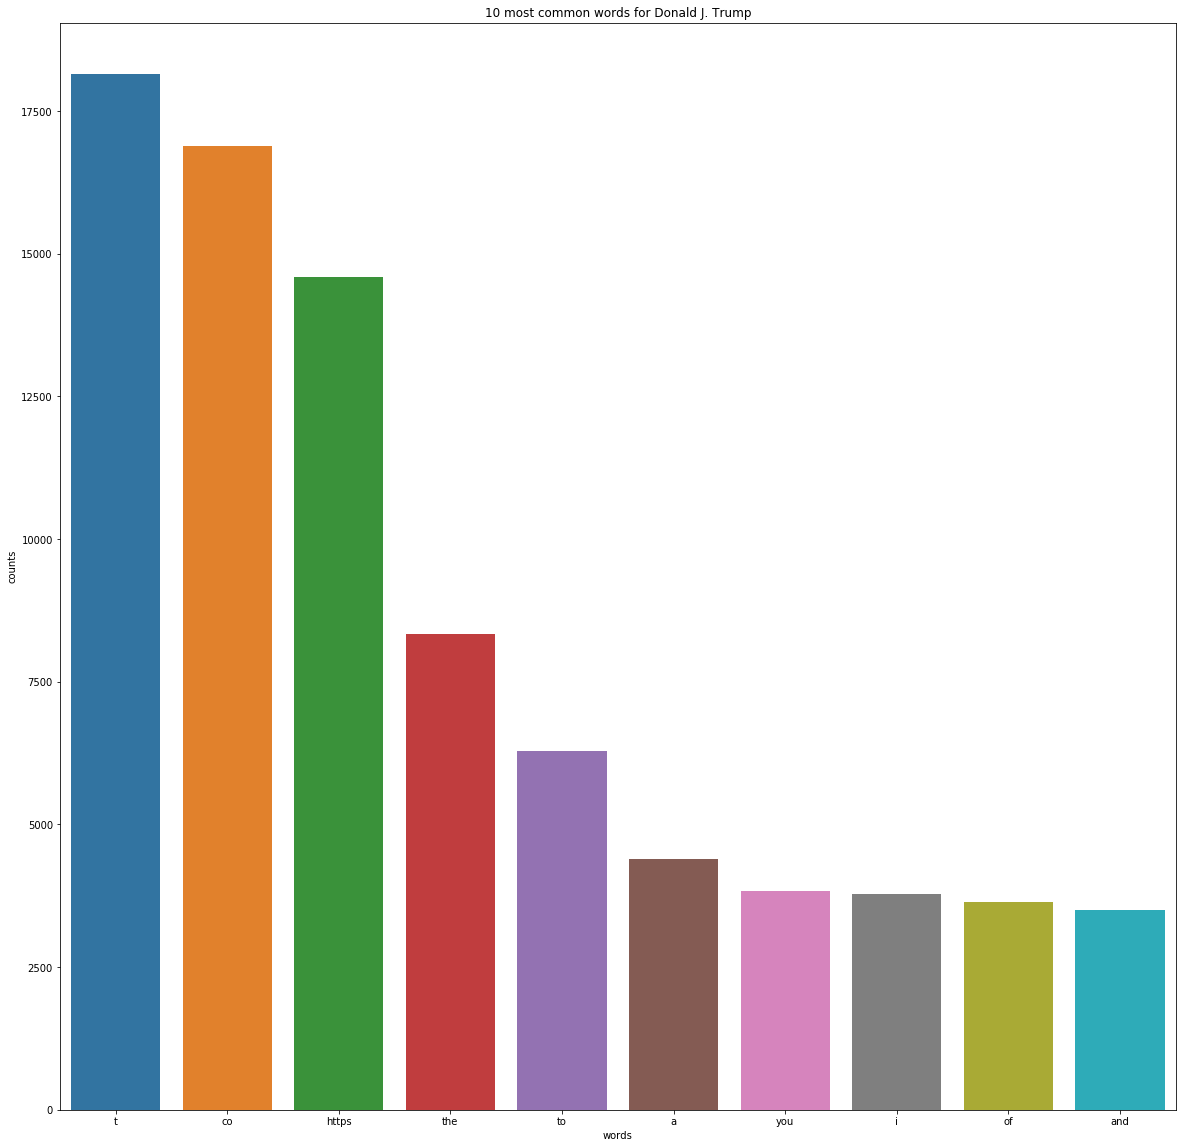

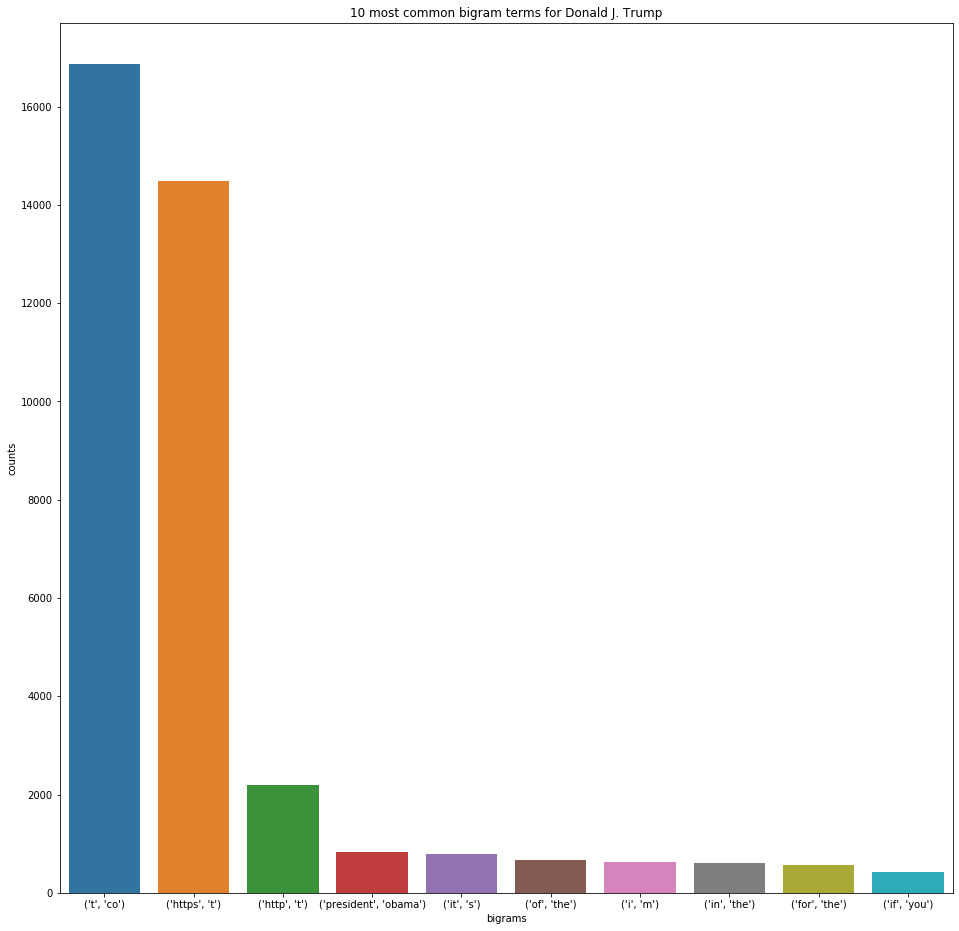

In [219]:
unigram_dist = nltk.FreqDist([word for des in data['tweet'] for word in des.split(" ") if word != ""])
vocab = unigram_dist.keys()
top_10_unigram = pd.DataFrame(unigram_dist.most_common(10), columns = ['words','counts'])
fig = plt.figure(figsize=(20,20))
sns.barplot(x='words',y='counts', data=top_10_unigram)
plt.title("10 most common words for %s" %author)
plt.show()

# bigrams
bigram_dist = nltk.FreqDist(nltk.ngrams([word for des in data['tweet'] for word in des.split(" ") if word != ""], 2))
top_10_bigrams = pd.DataFrame(bigram_dist.most_common(10), columns = ['bigrams', 'counts'])
fig = plt.figure(figsize=(16,16))
sns.barplot(x='bigrams',y='counts', data=top_10_bigrams)
plt.title("10 most common bigram terms for %s" %author)
plt.show()

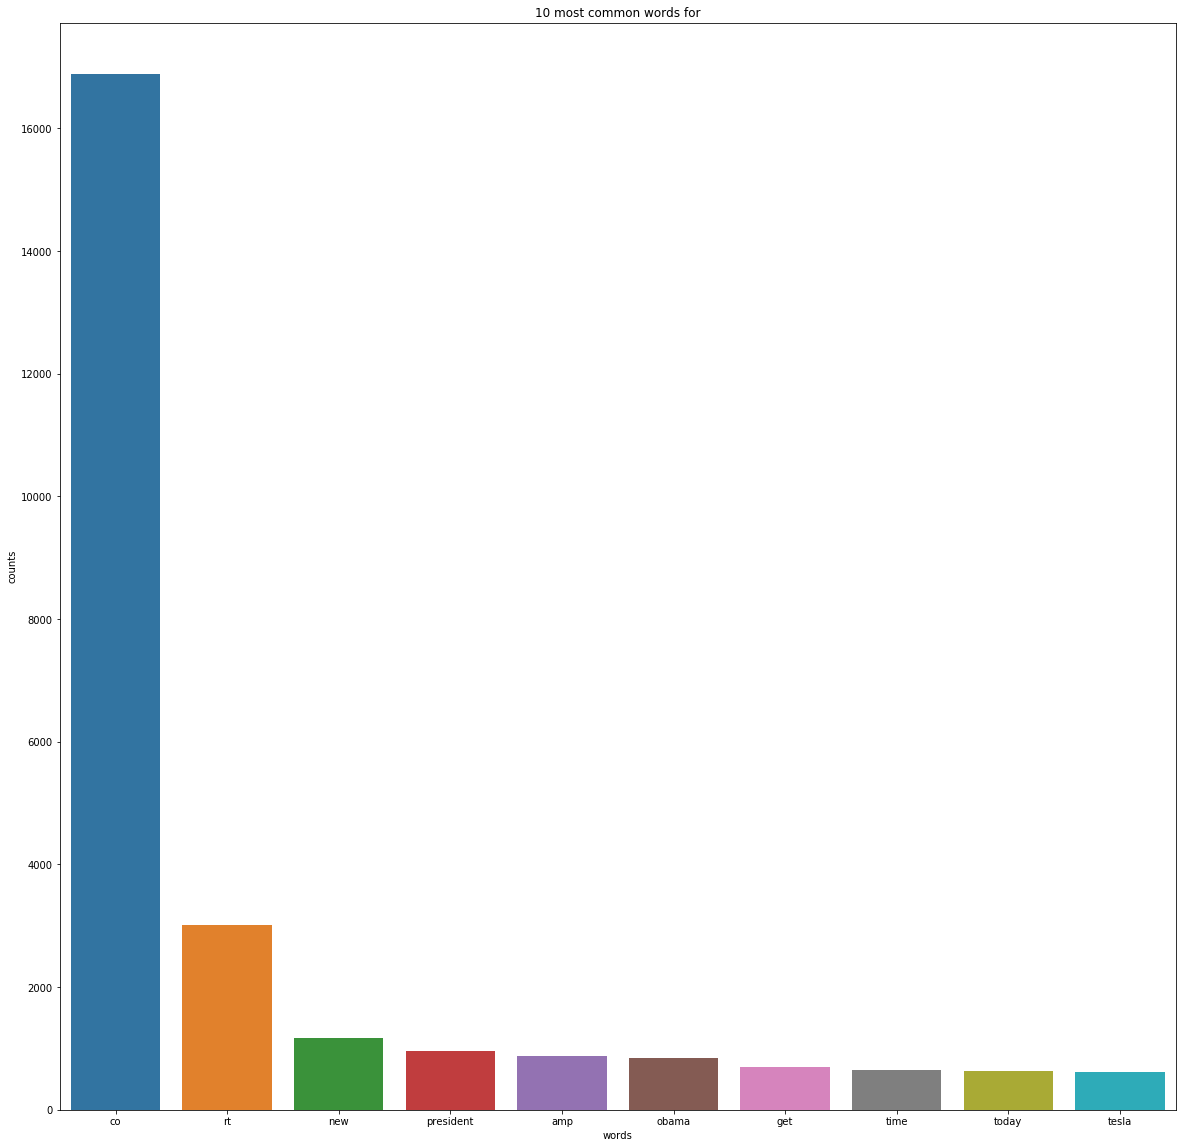

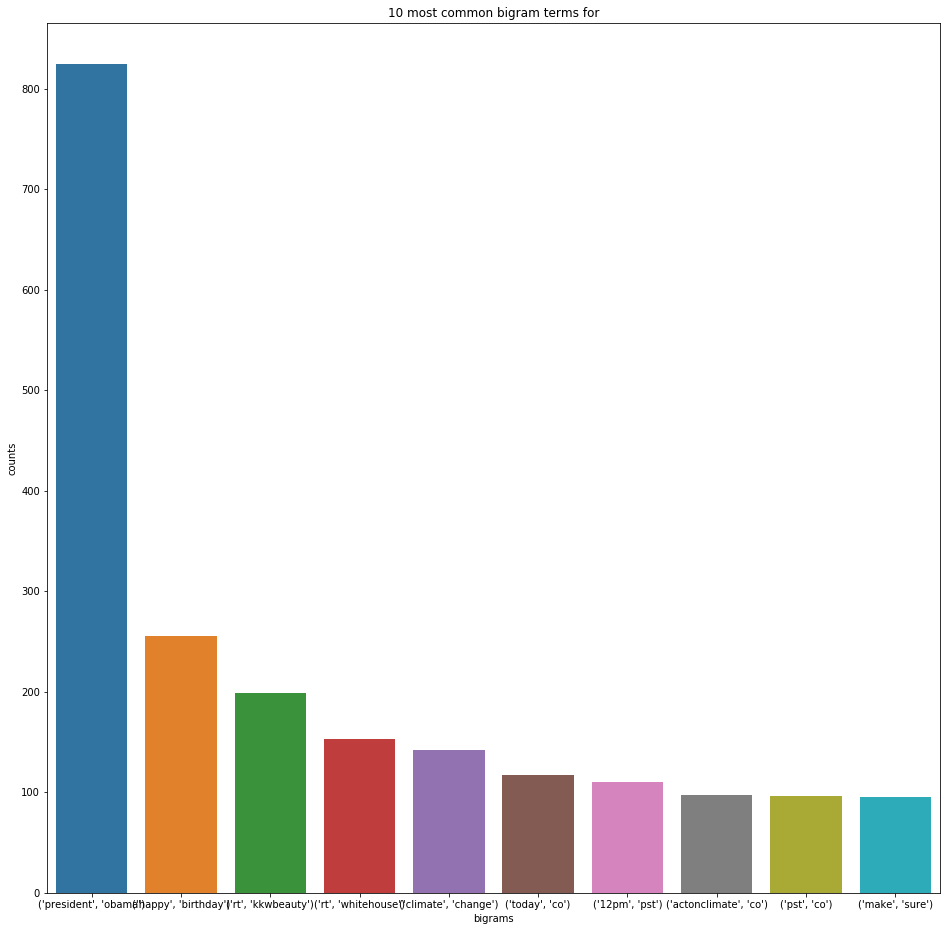

In [227]:
unigram_dist = nltk.FreqDist([word for des in data['tweet_no_stop'] for word in des.split(" ") if word != ""])
vocab = unigram_dist.keys()
top_10_unigram = pd.DataFrame(unigram_dist.most_common(10), columns = ['words','counts'])
fig = plt.figure(figsize=(20,20))
sns.barplot(x='words',y='counts', data=top_10_unigram)
plt.title("10 most common words for")
plt.show()

# bigrams
bigram_dist = nltk.FreqDist(nltk.ngrams([word for des in data['tweet_no_stop'] for word in des.split(" ") if word != ""], 2))
top_10_bigrams = pd.DataFrame(bigram_dist.most_common(10), columns = ['bigrams', 'counts'])
fig = plt.figure(figsize=(16,16))
sns.barplot(x='bigrams',y='counts', data=top_10_bigrams)
plt.title("10 most common bigram terms for")
plt.show()

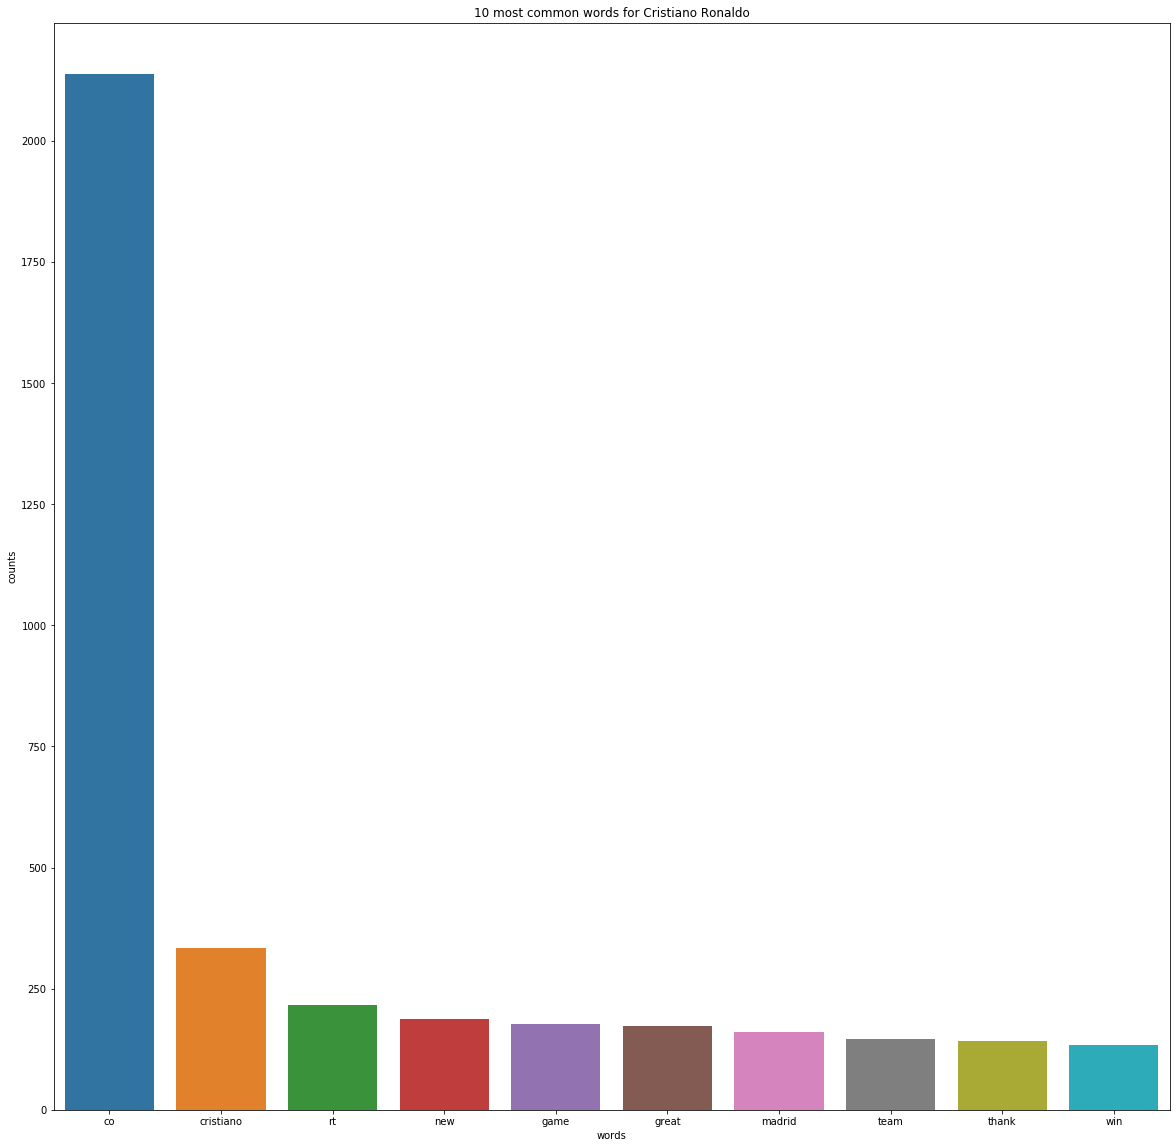

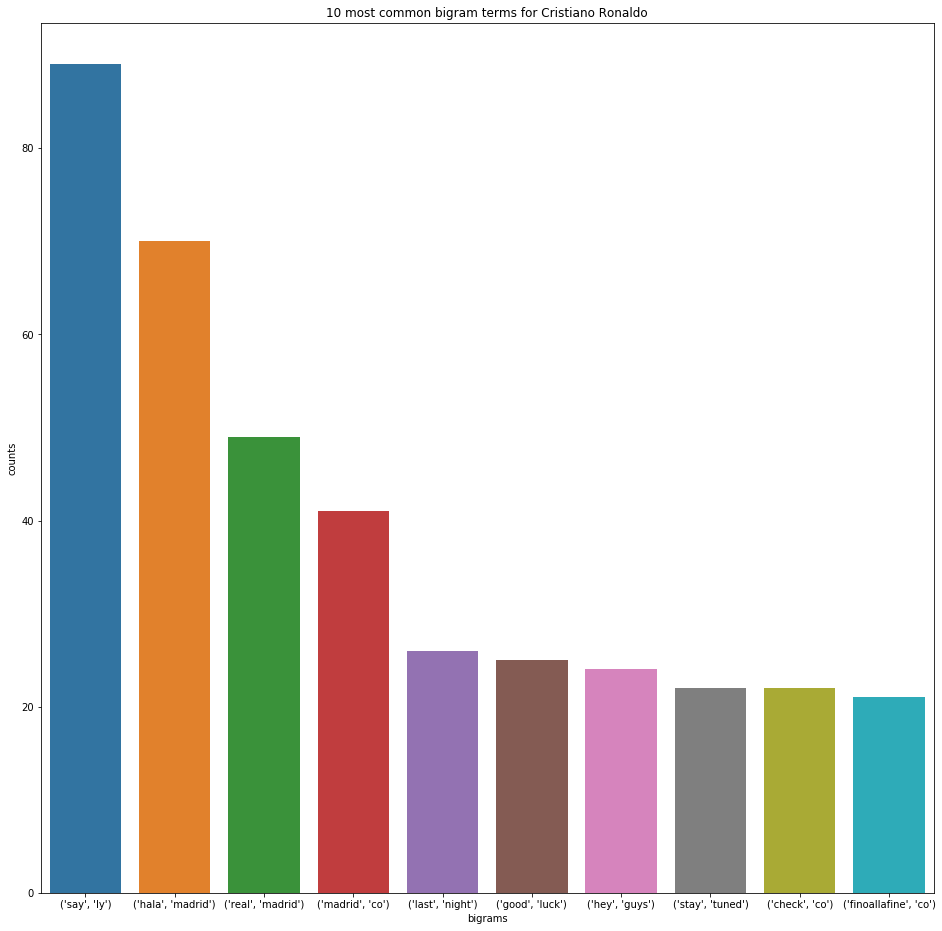

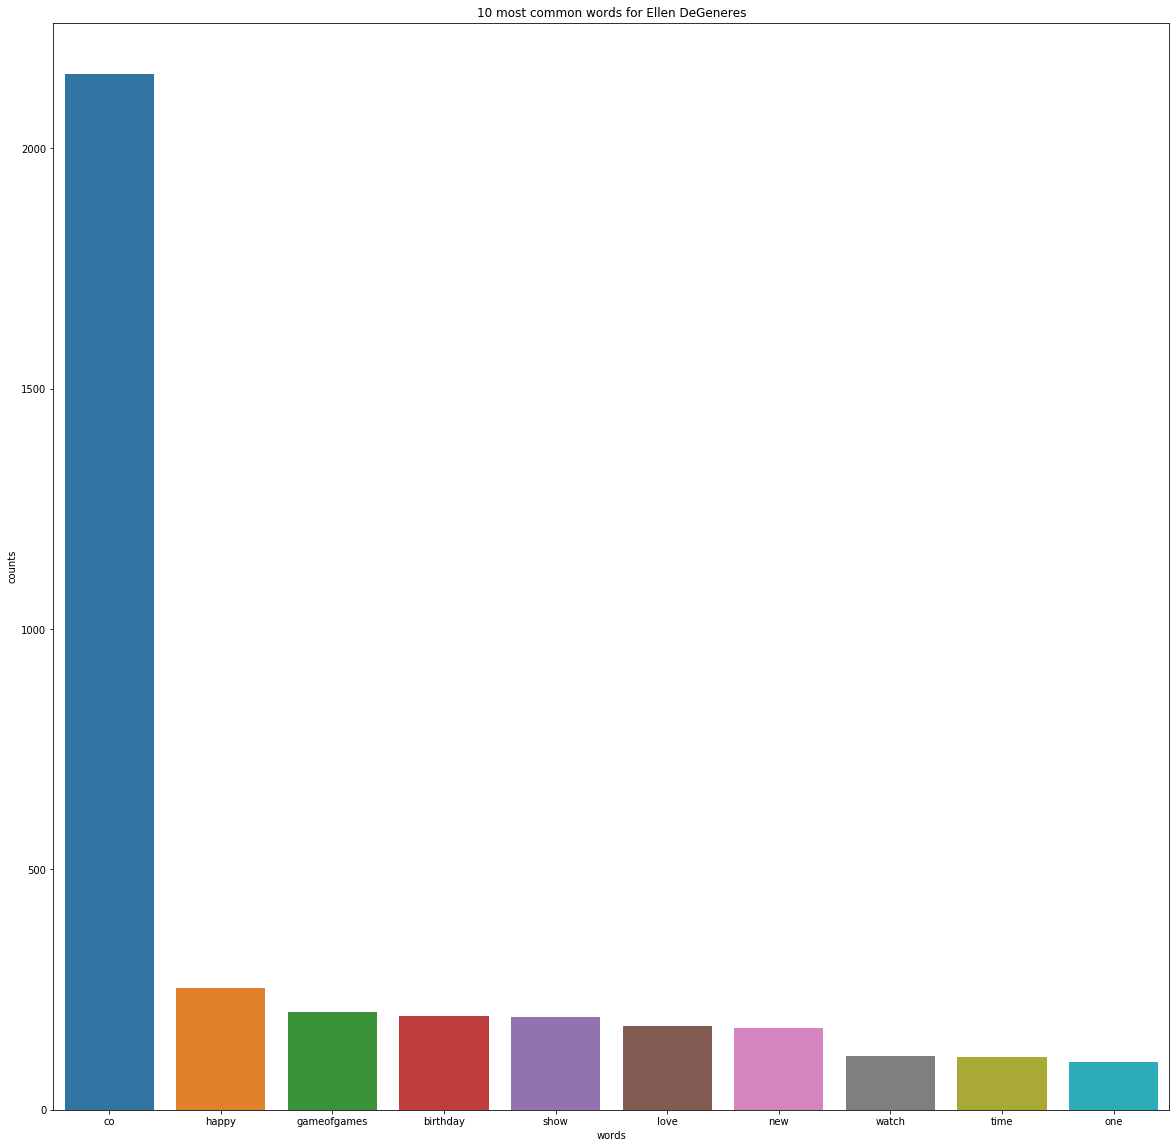

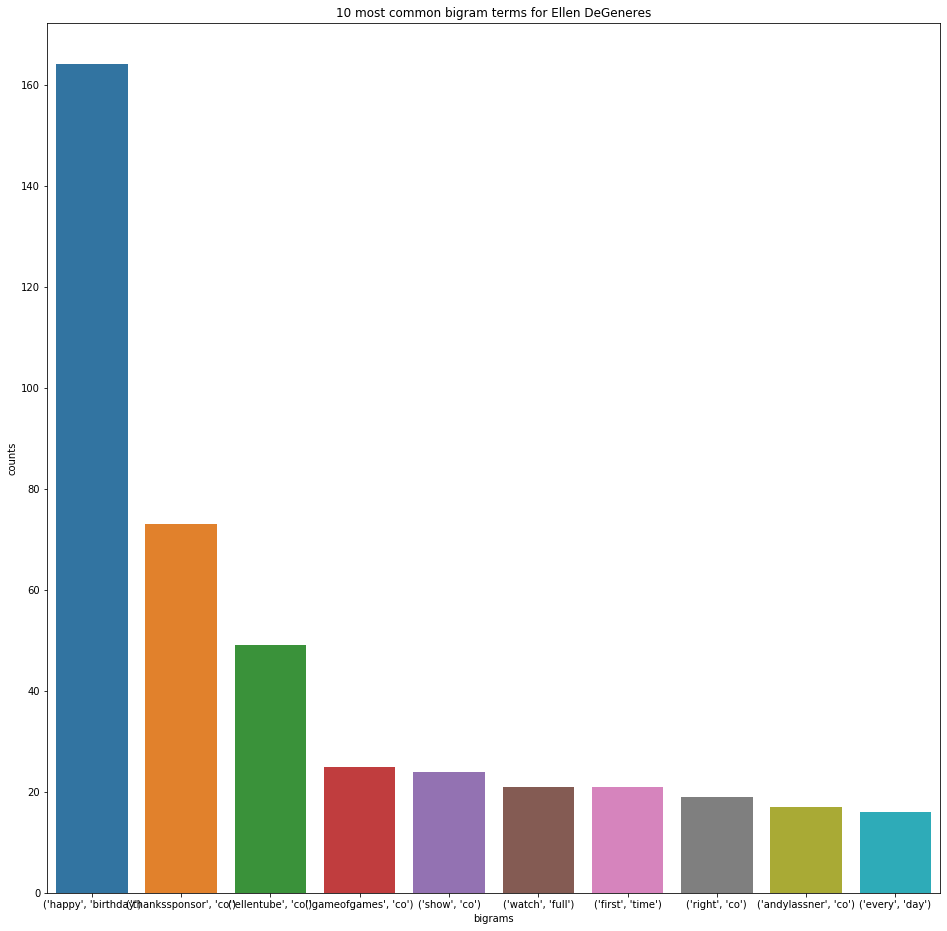

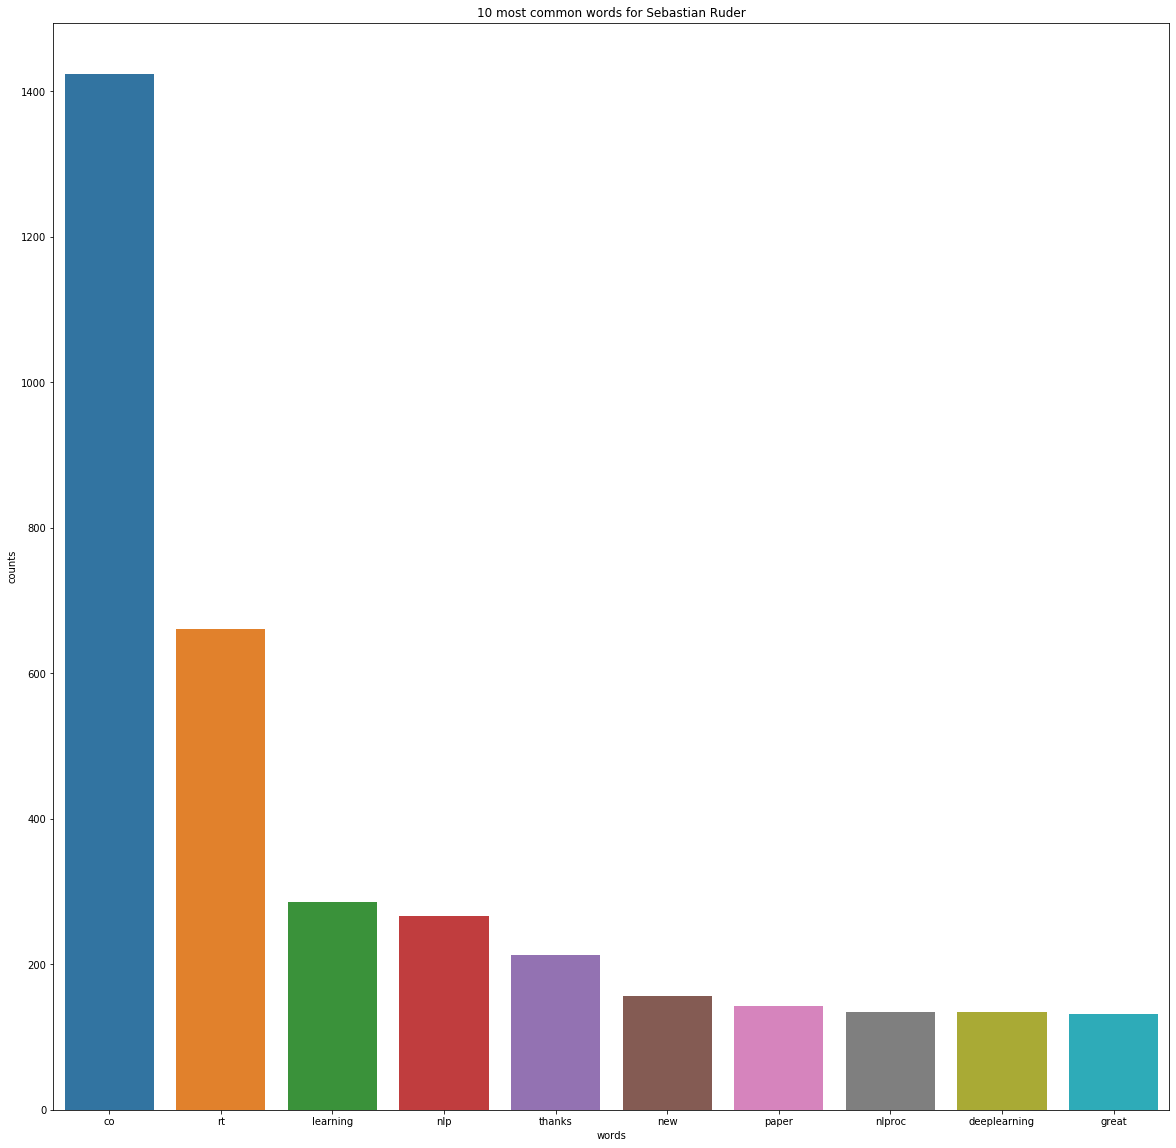

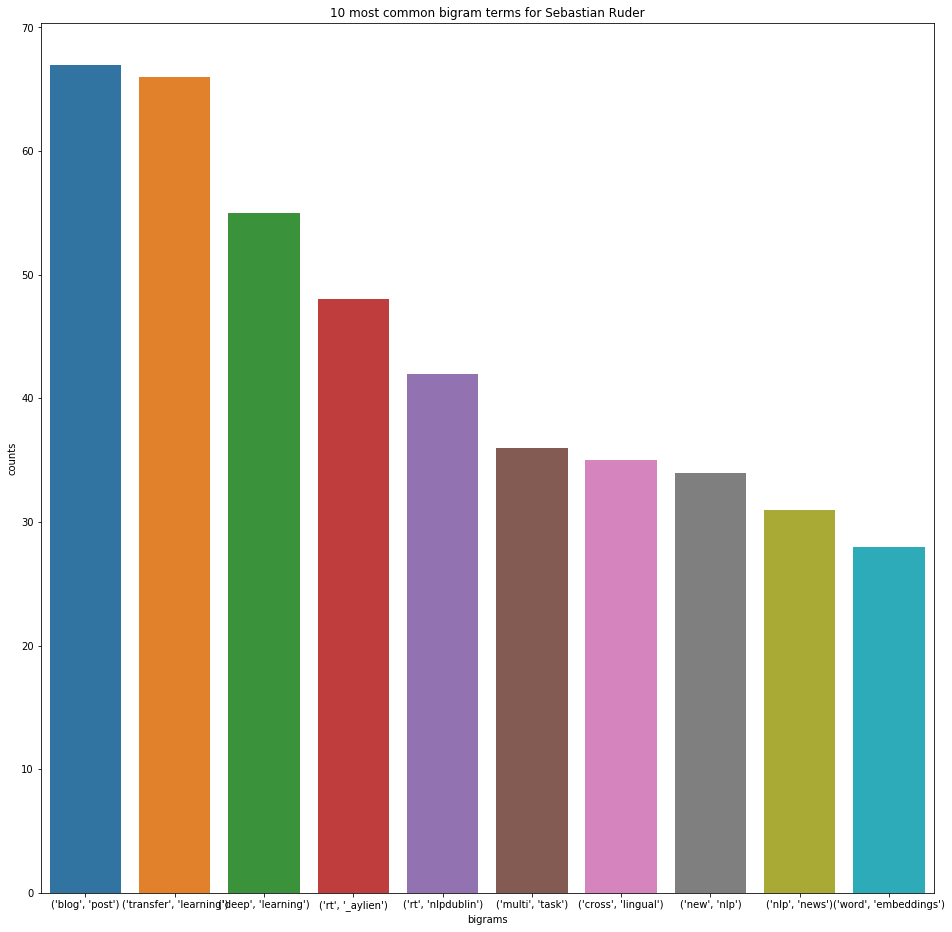

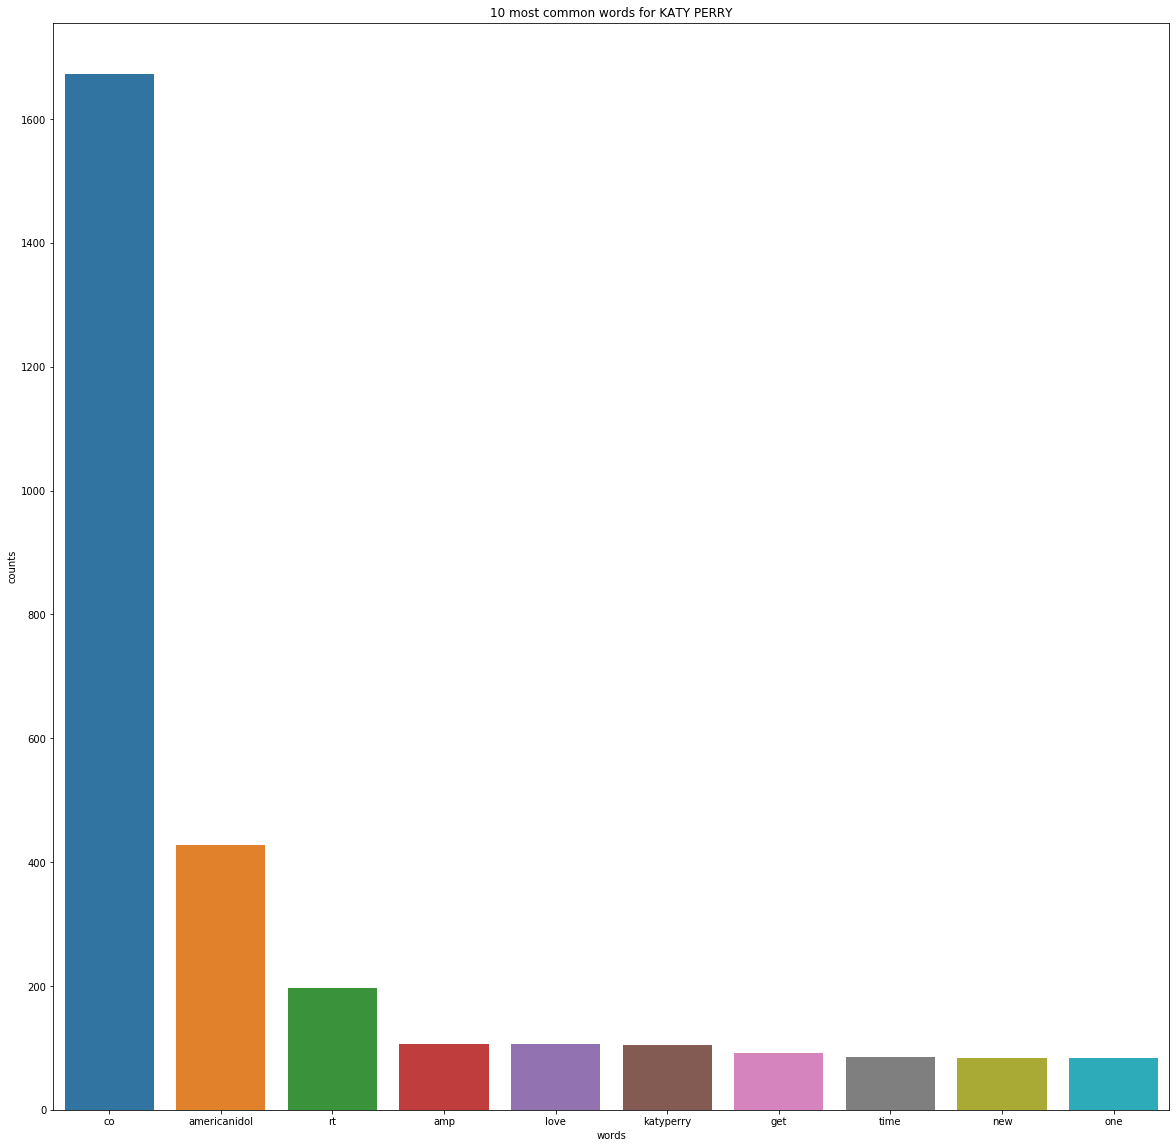

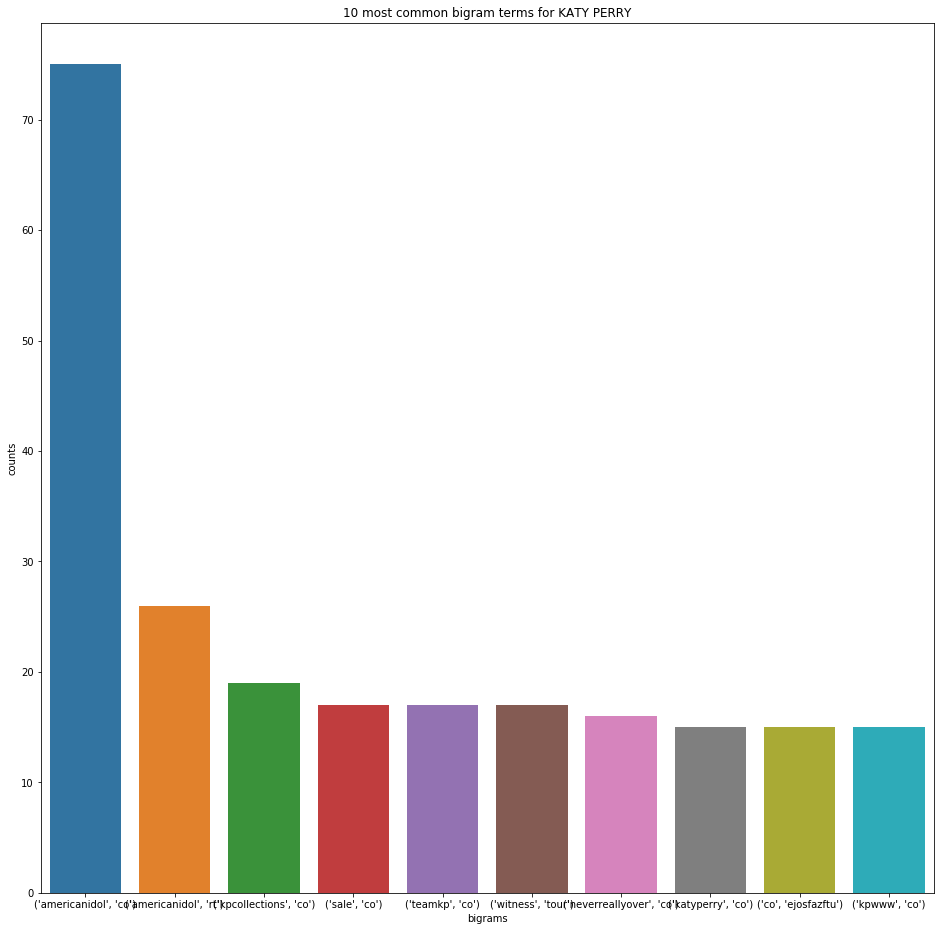

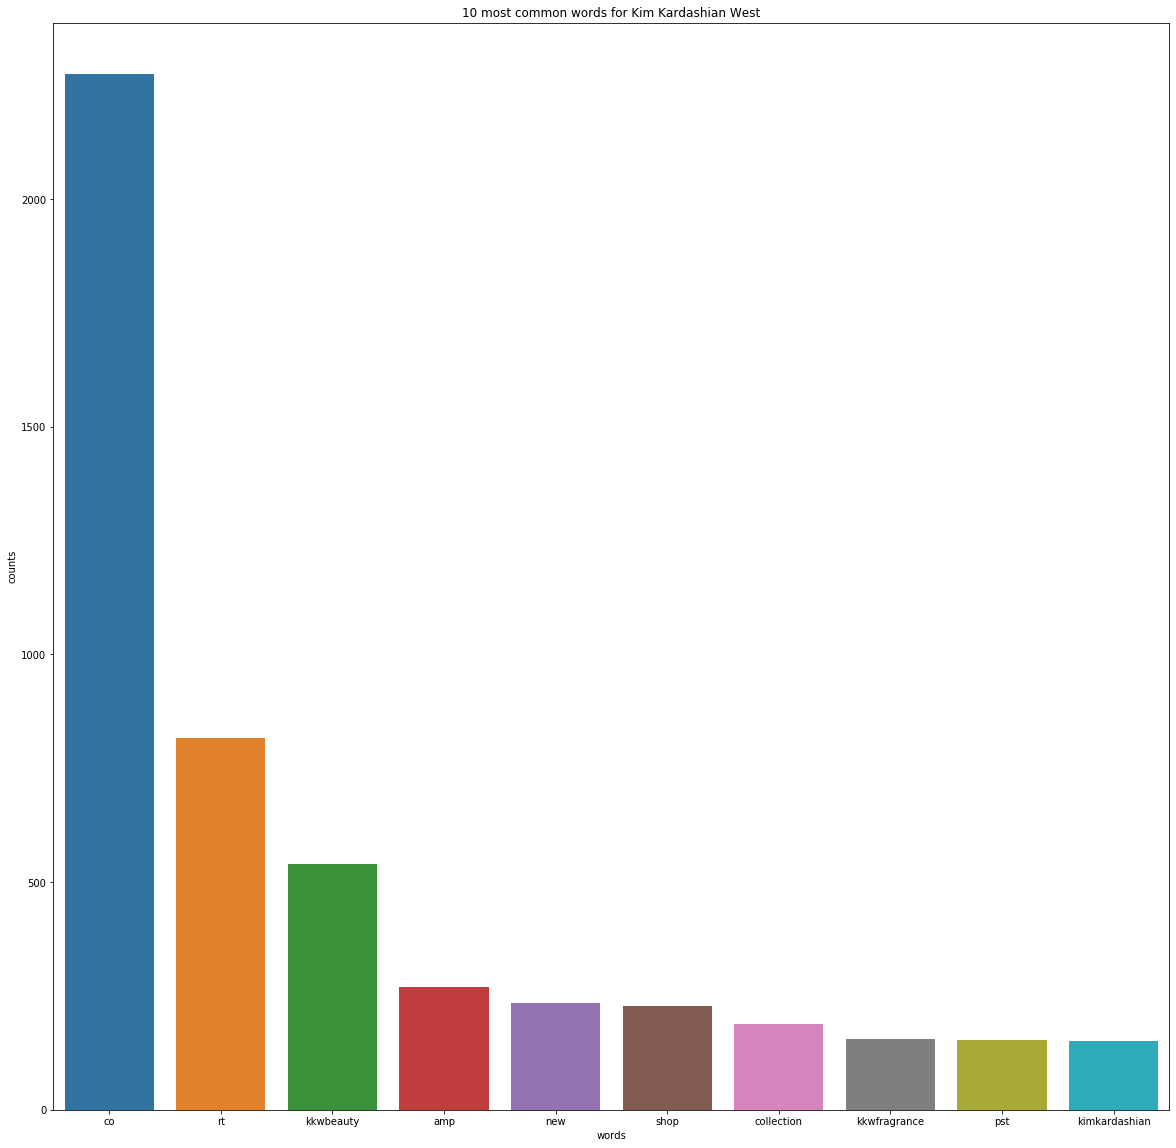

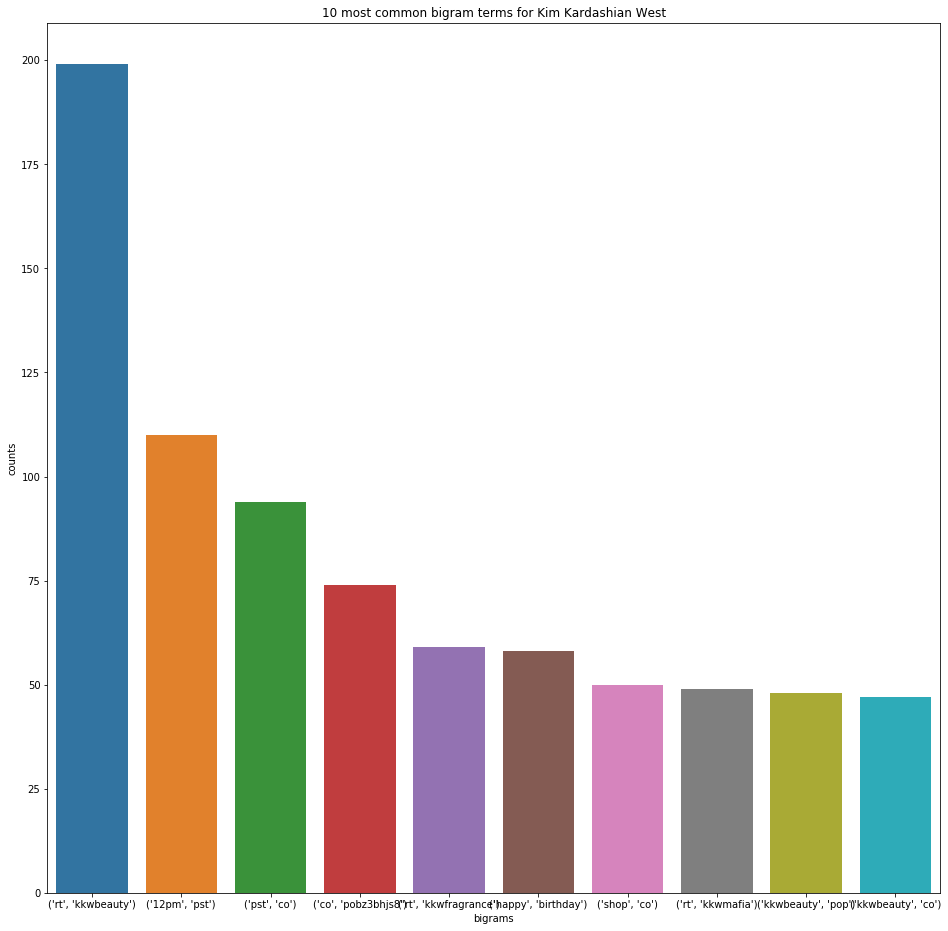

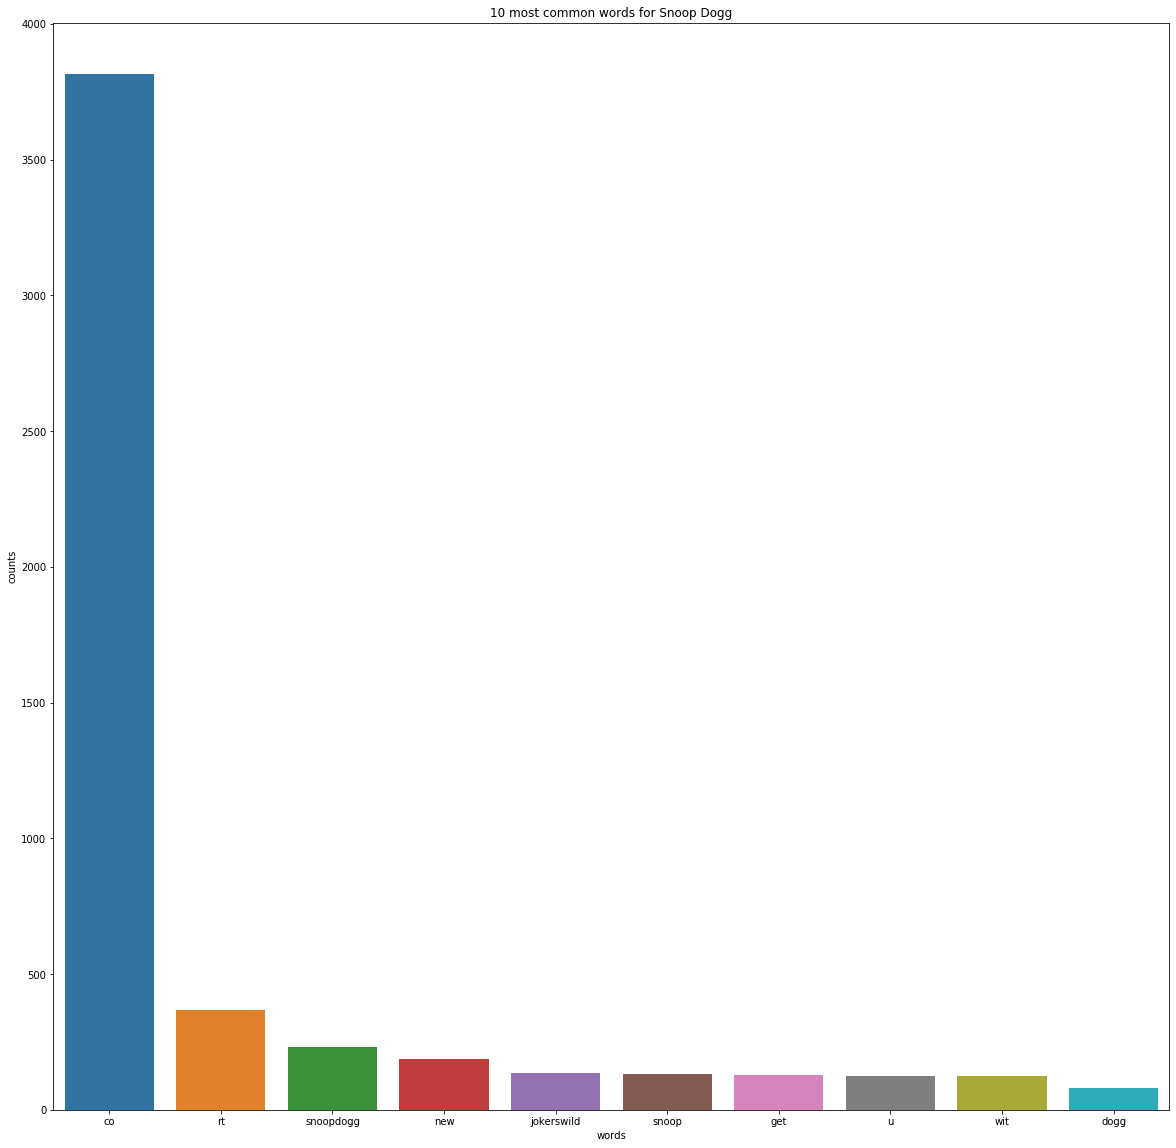

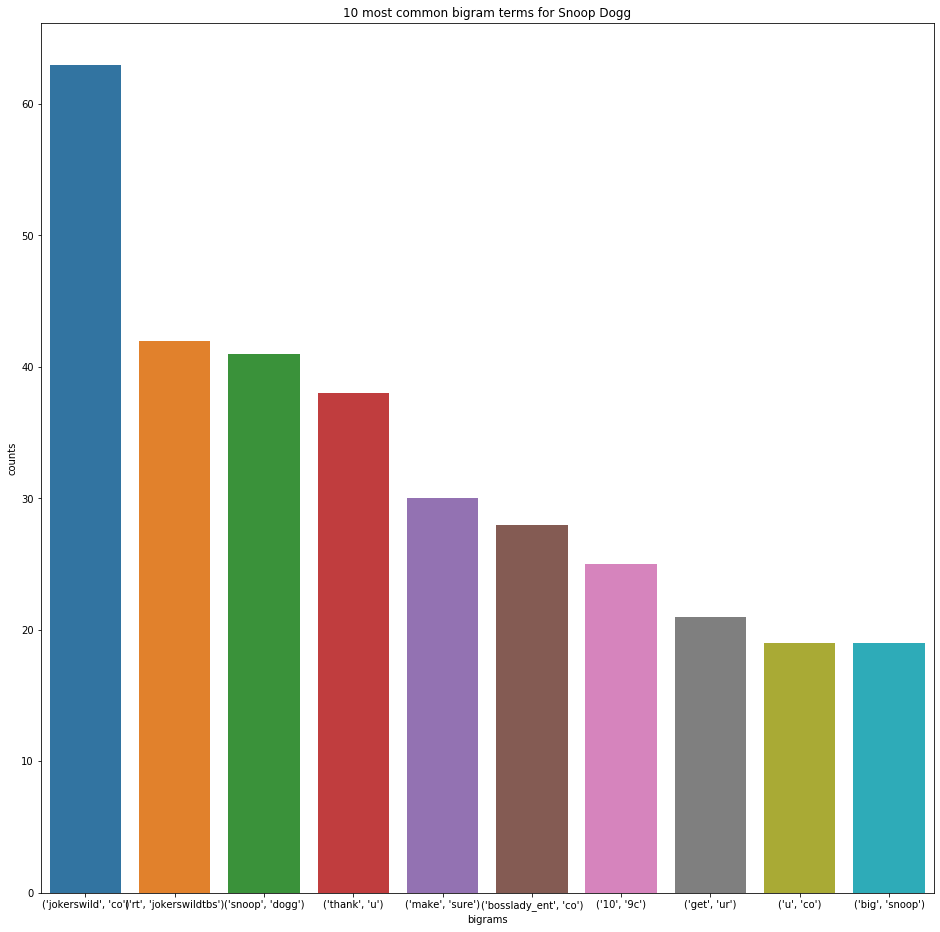

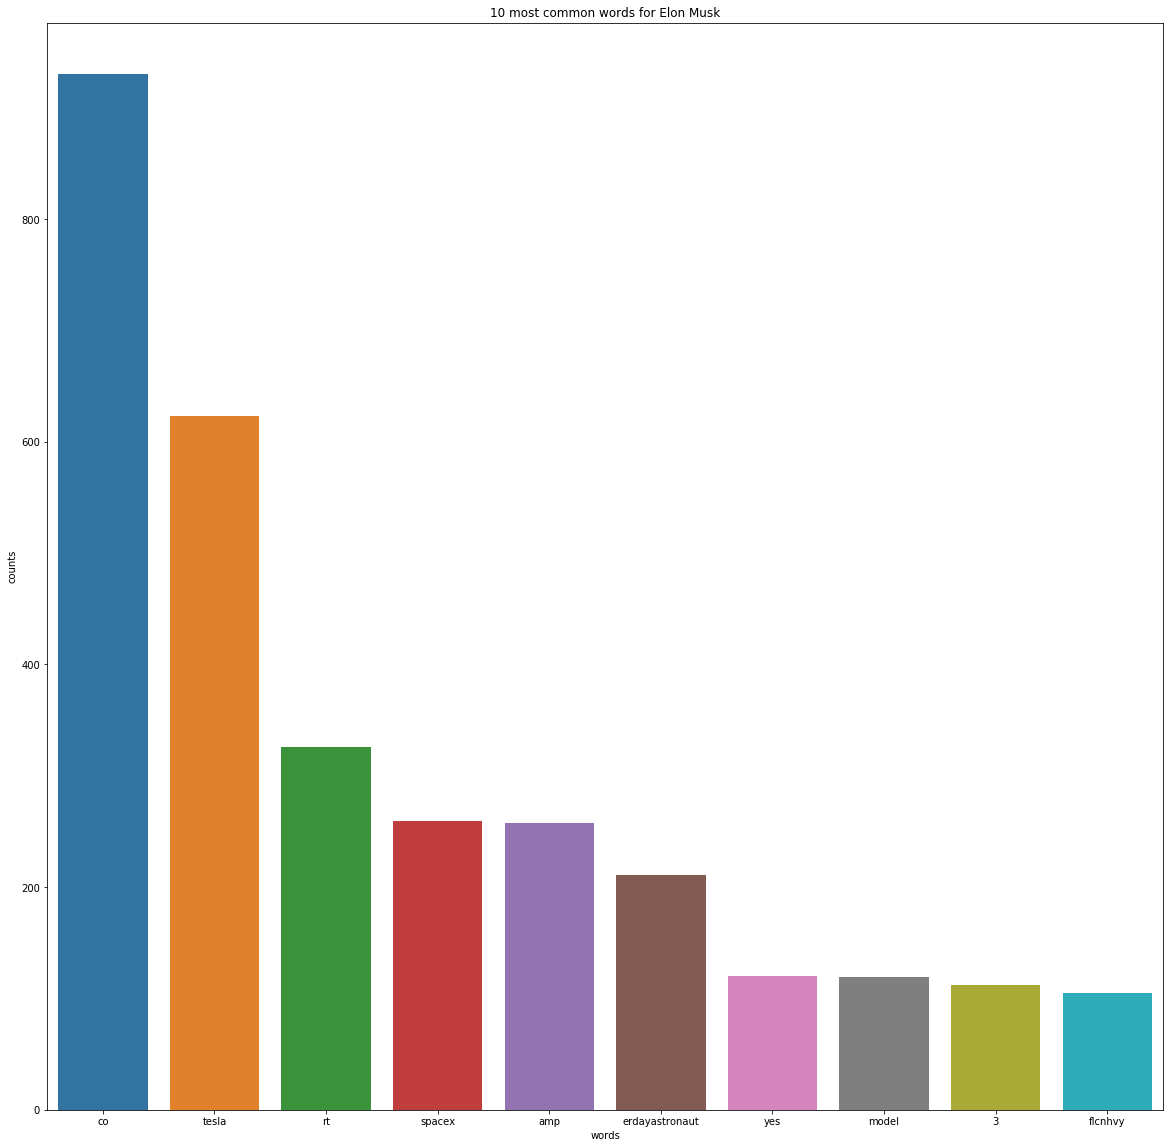

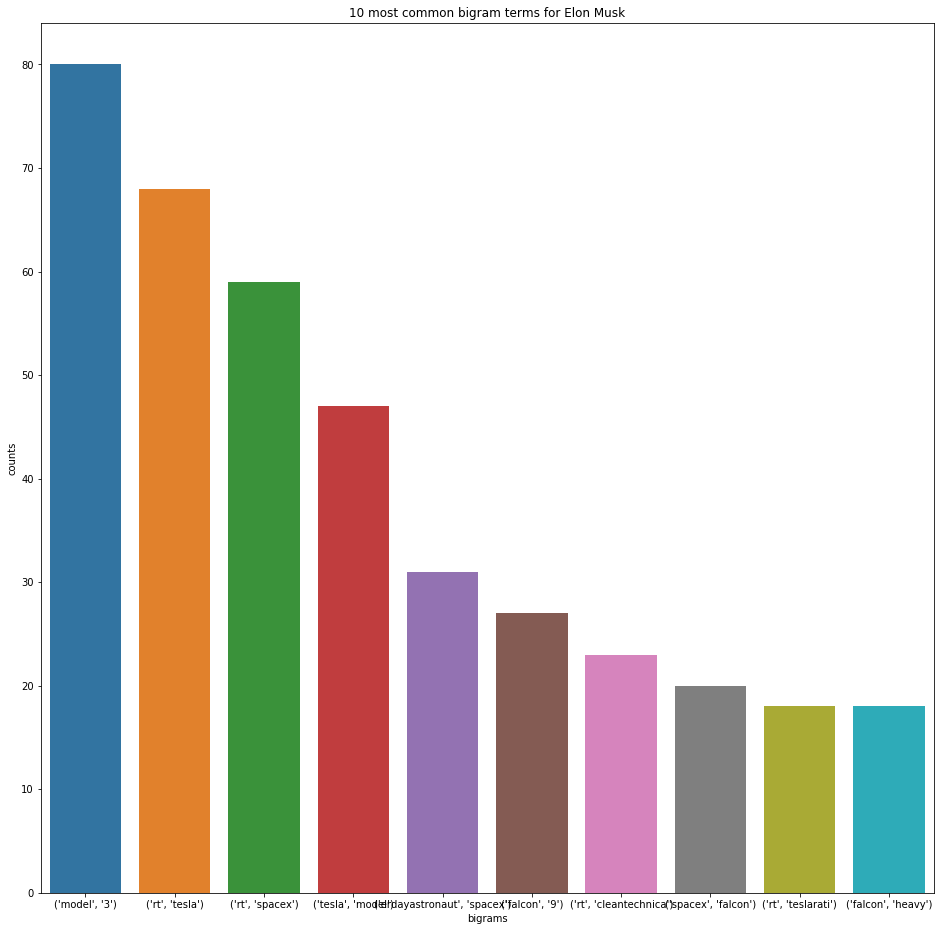

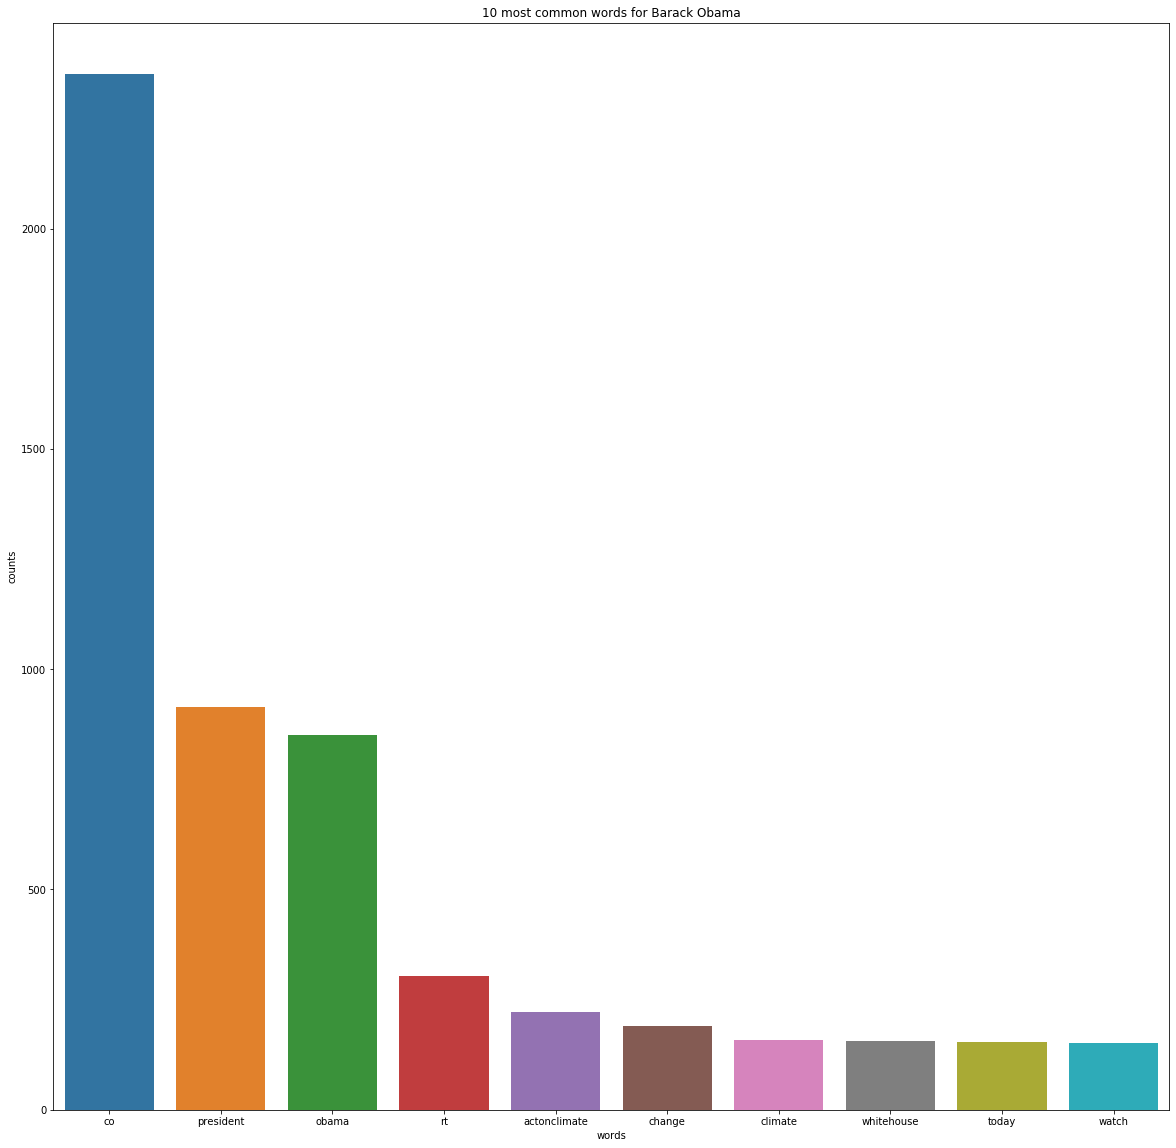

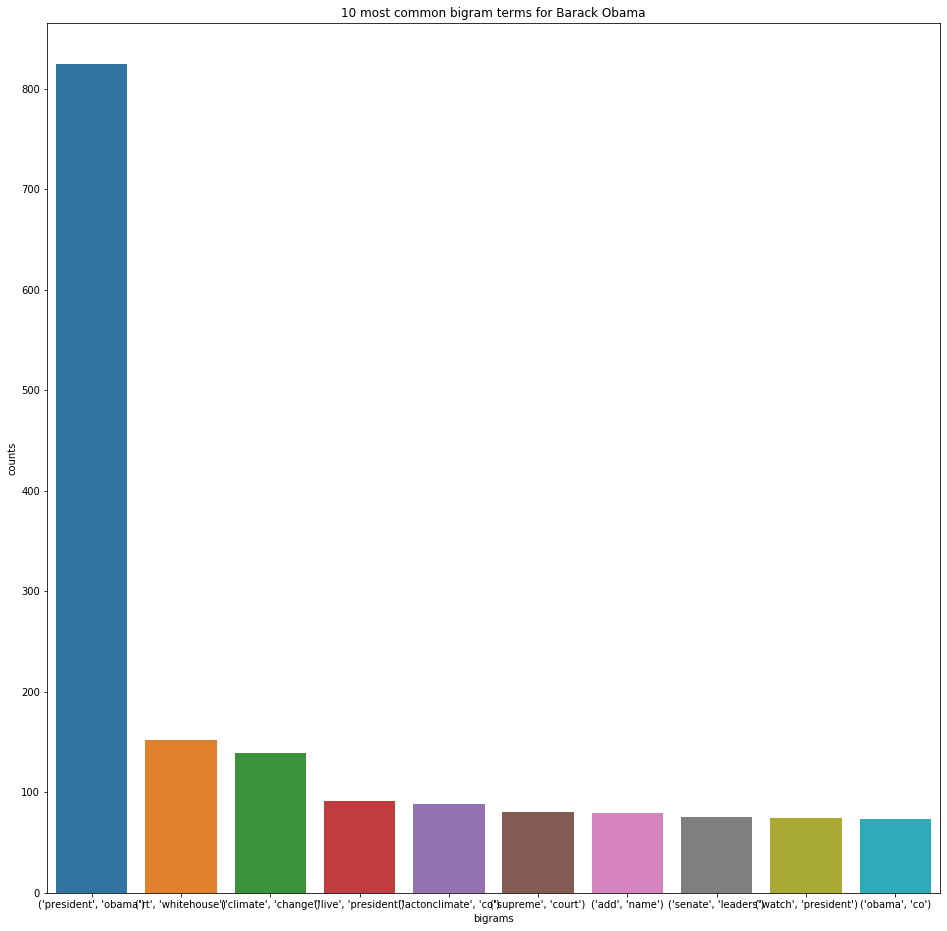

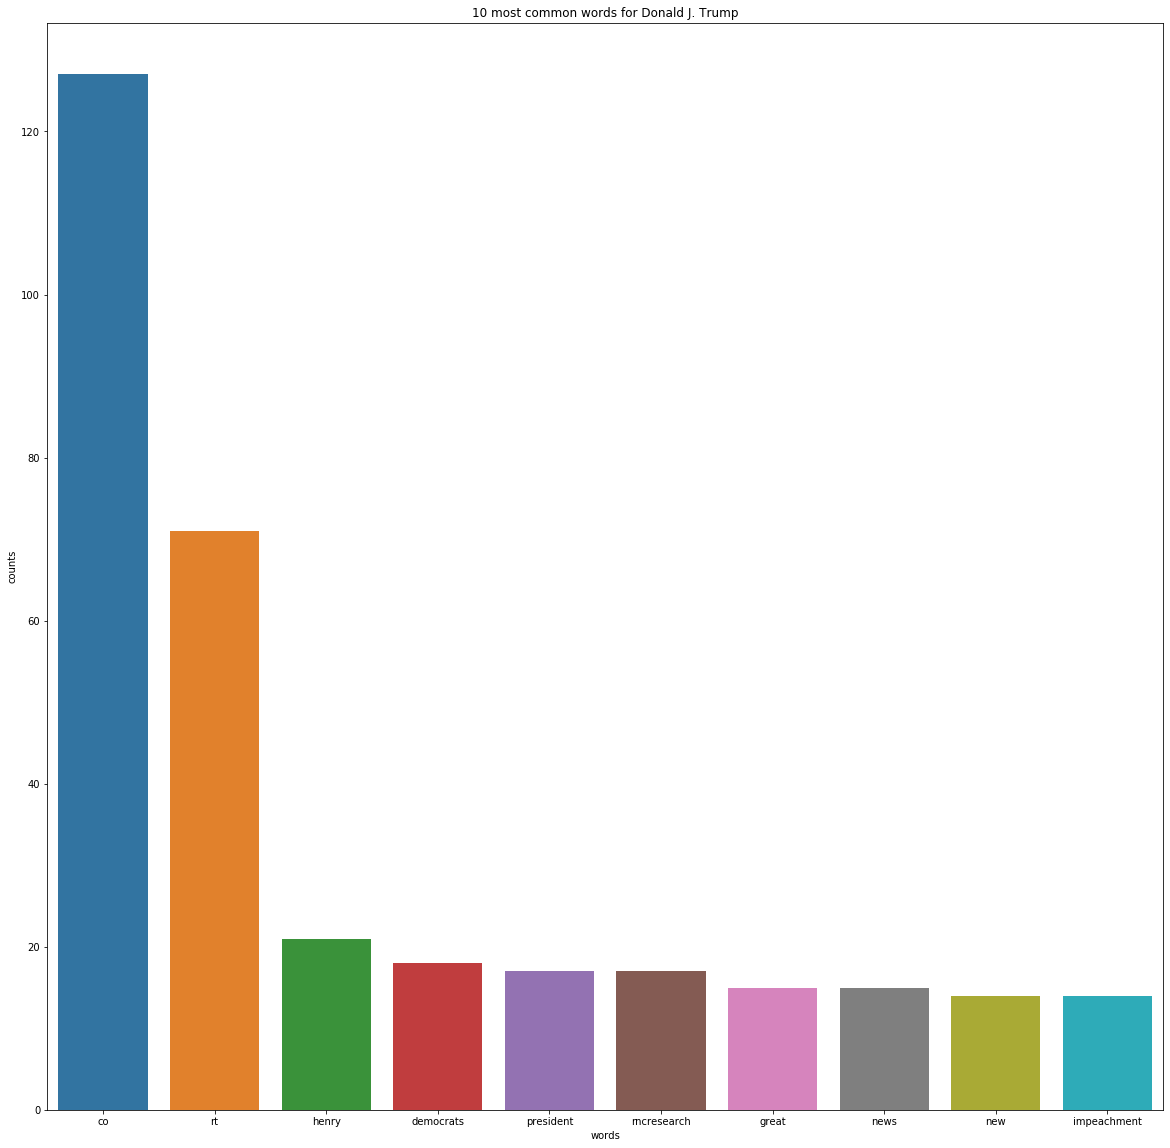

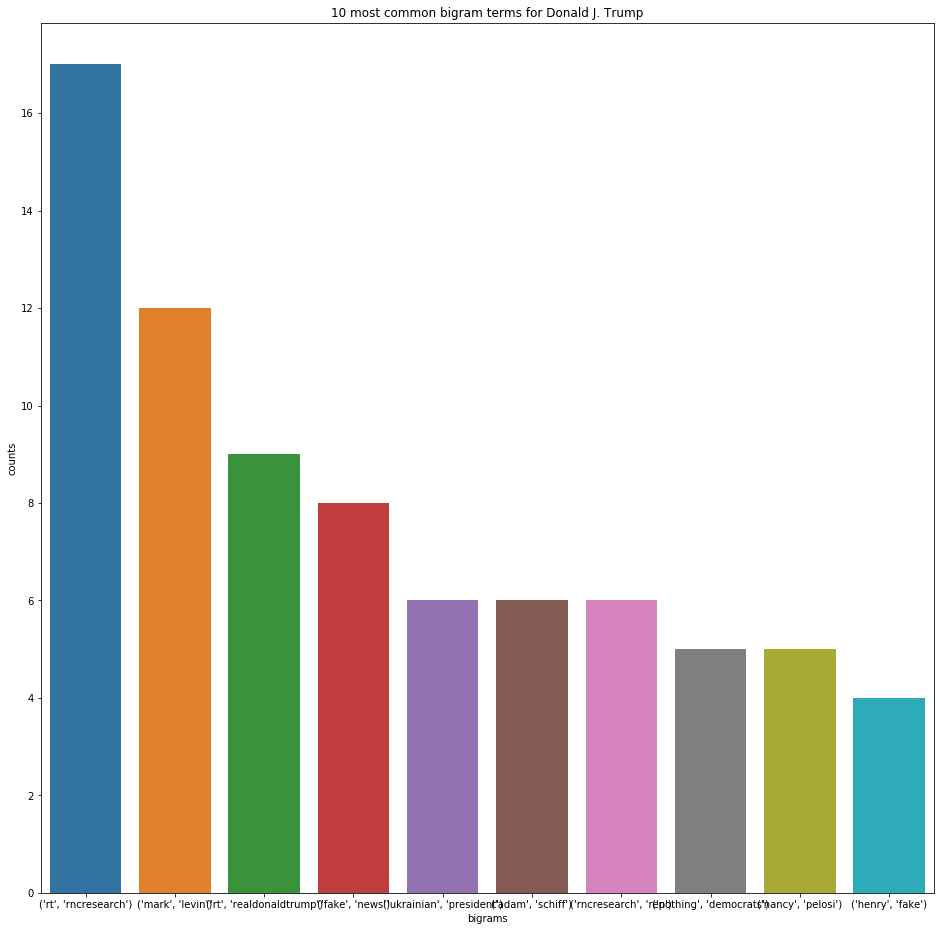

In [228]:
for author in pd.unique(data['author']):
    unigram_dist = nltk.FreqDist([word for des in data[data['author']==author]['tweet_no_stop'] for word in des.split(" ") if word != ""])
    top_10_unigram = pd.DataFrame(unigram_dist.most_common(10), columns = ['words','counts'])
    fig = plt.figure(figsize=(20,20))
    sns.barplot(x='words',y='counts', data=top_10_unigram)
    plt.title("10 most common words for %s" %author)
    plt.show()
    
    # bigrams
    bigram_dist = nltk.FreqDist(nltk.ngrams([word for des in data[data['author']==author]['tweet_no_stop'] for word in des.split(" ") if word != ""], 2))
    top_10_bigrams = pd.DataFrame(bigram_dist.most_common(10), columns = ['bigrams', 'counts'])
    fig = plt.figure(figsize=(16,16))
    sns.barplot(x='bigrams',y='counts', data=top_10_bigrams)
    plt.title("10 most common bigram terms for %s" %author)
    plt.show()